<a href="https://colab.research.google.com/github/jiho98/Metrics/blob/main/Campaign_Demographic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>LinkedIn Info Session Campaign (2023 - 2024) - Demographic Analysis</center>

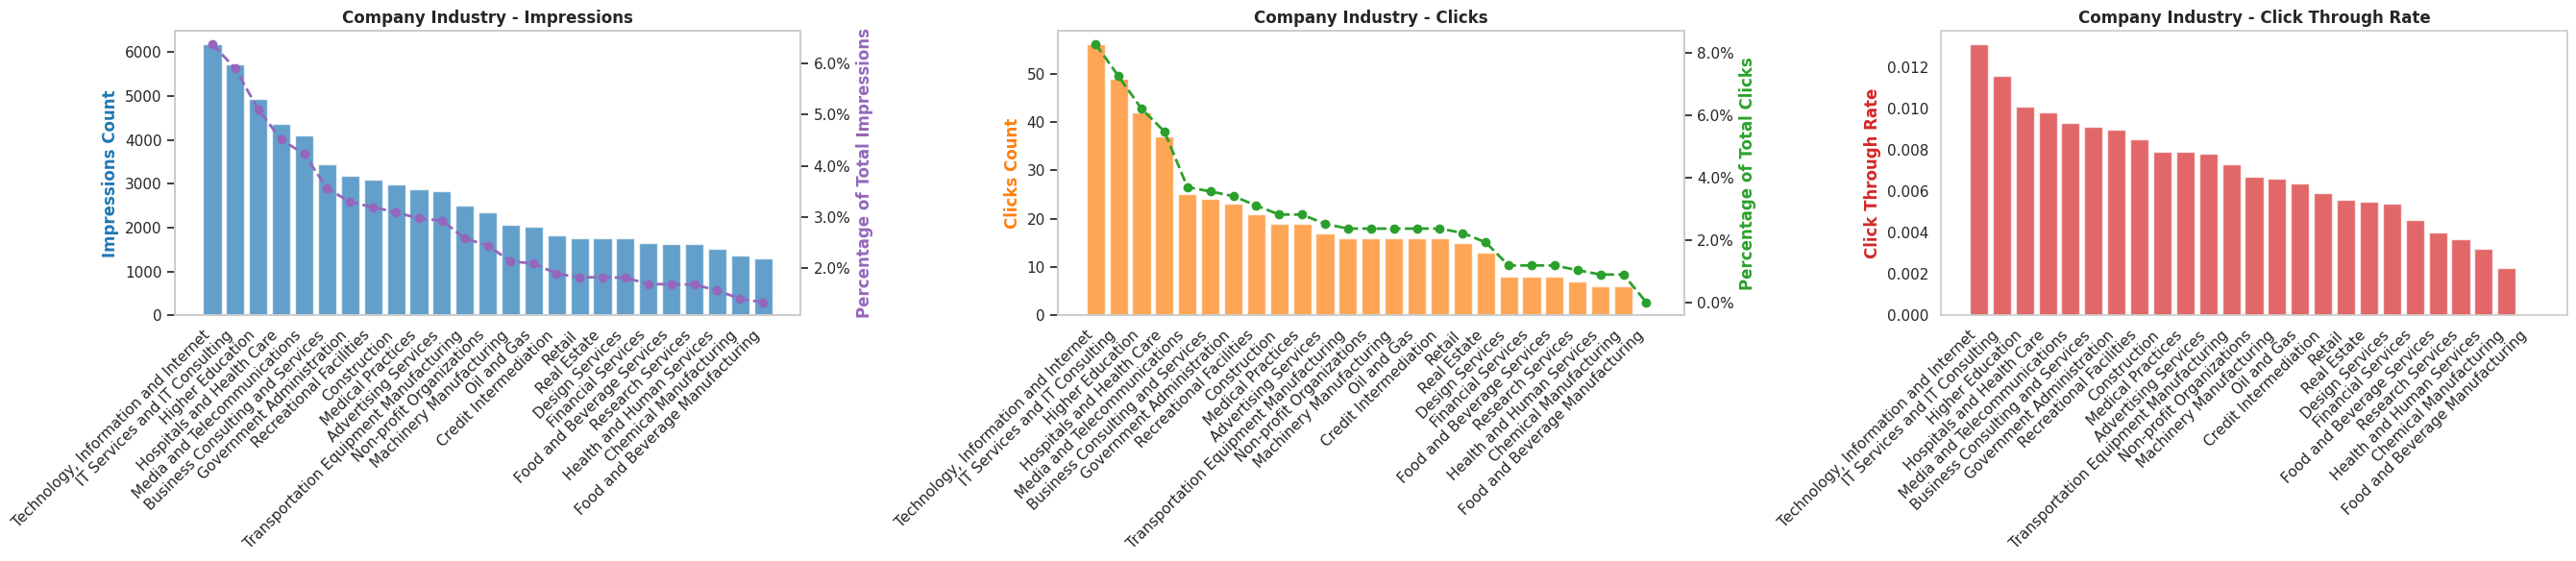

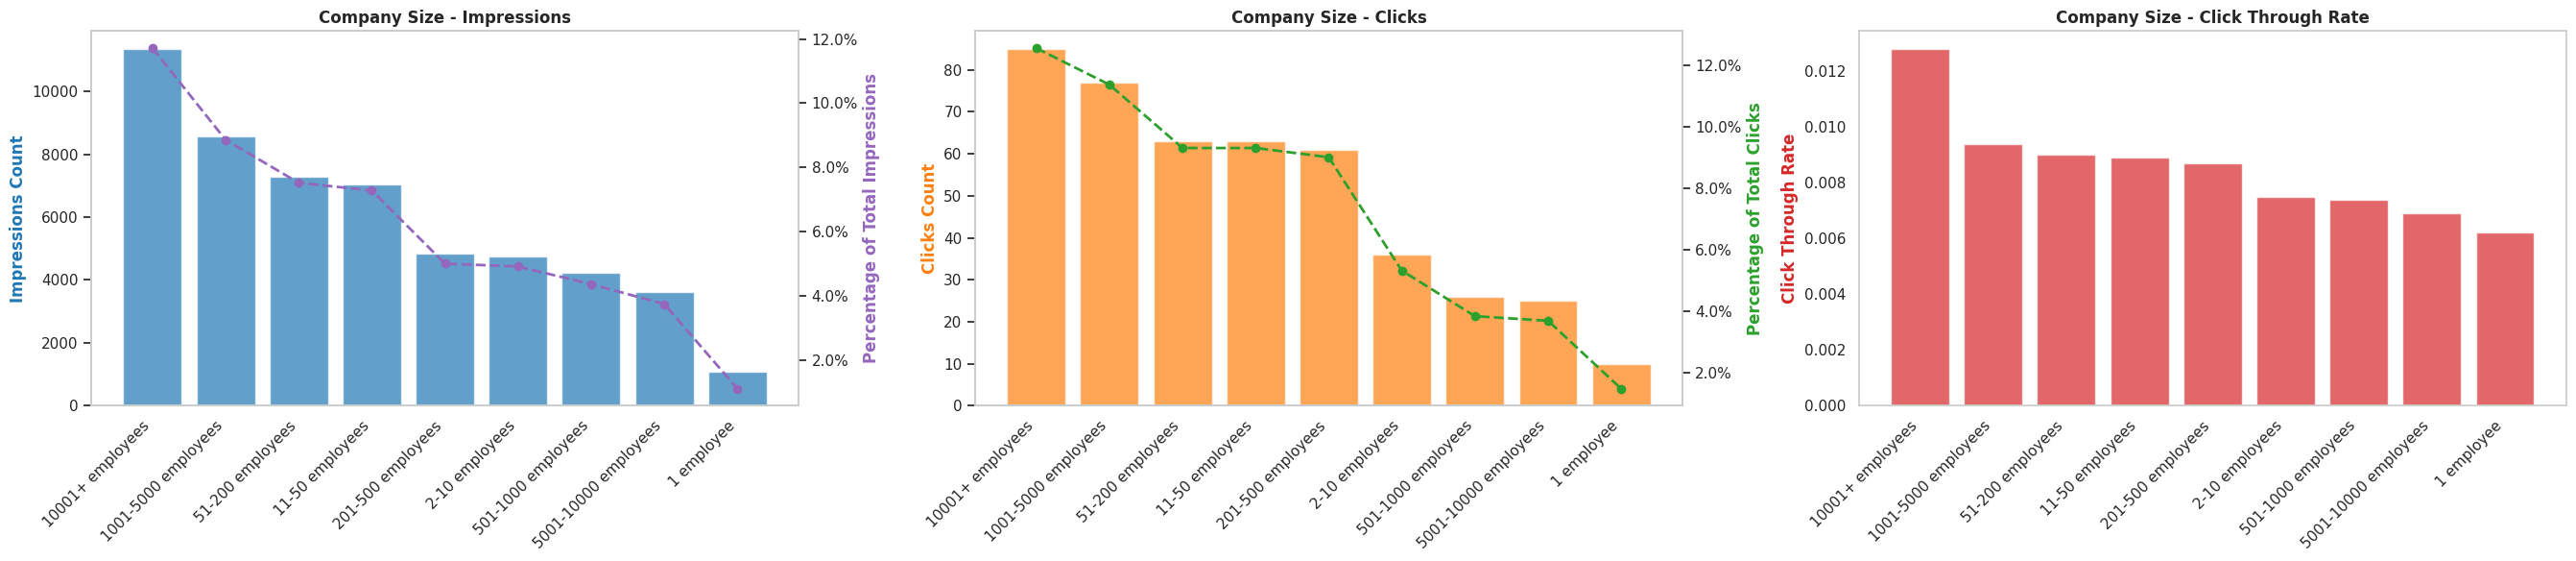

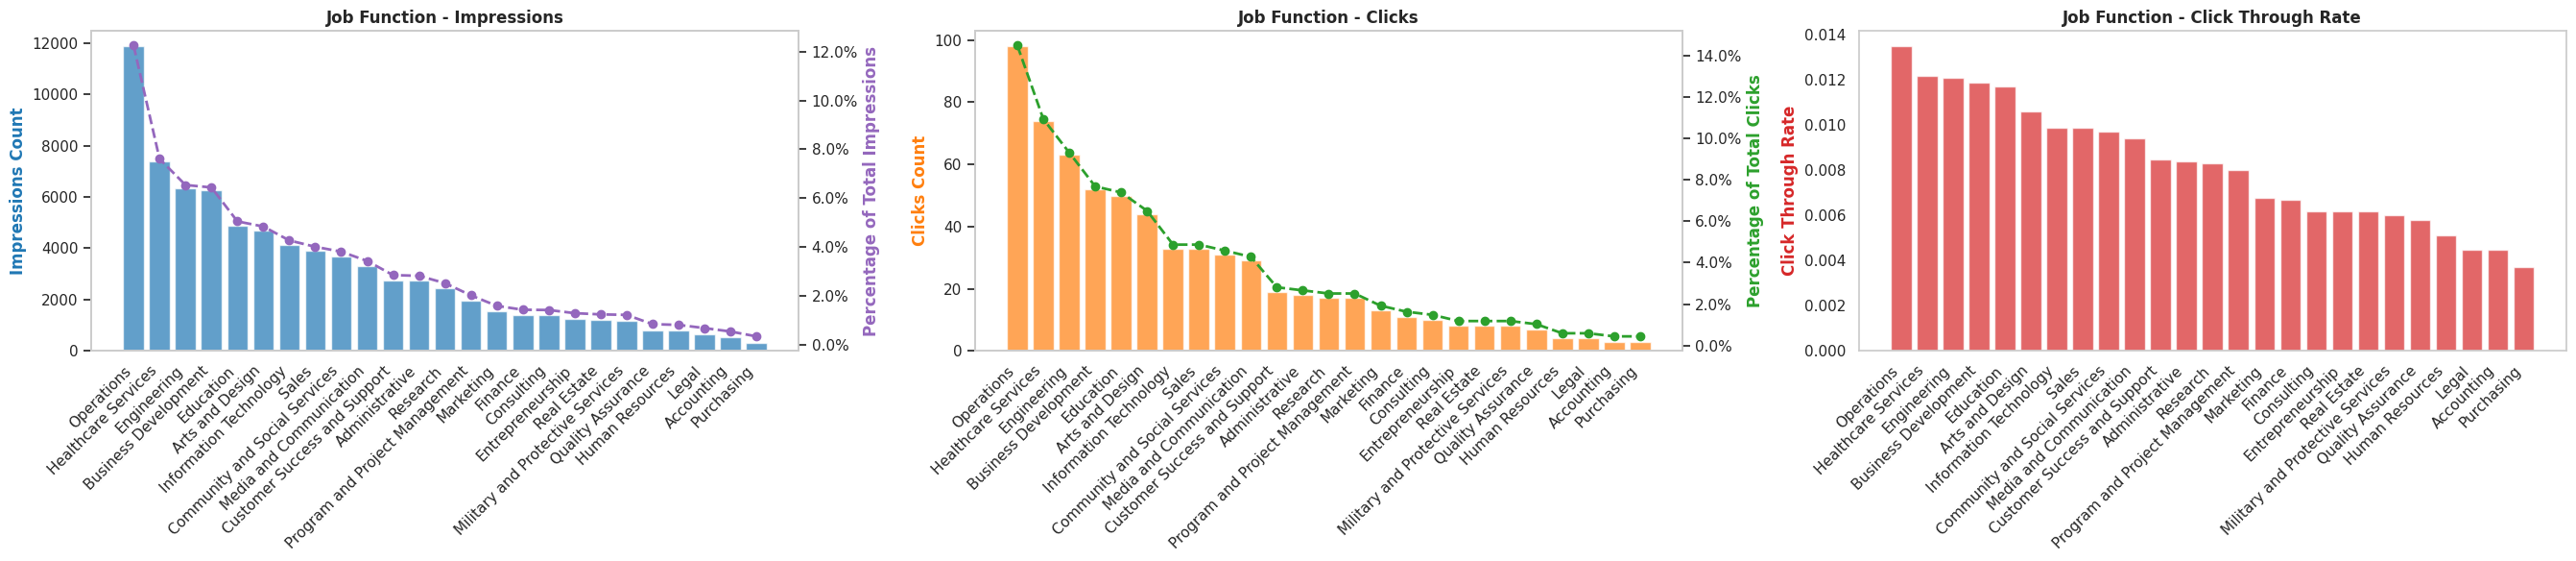

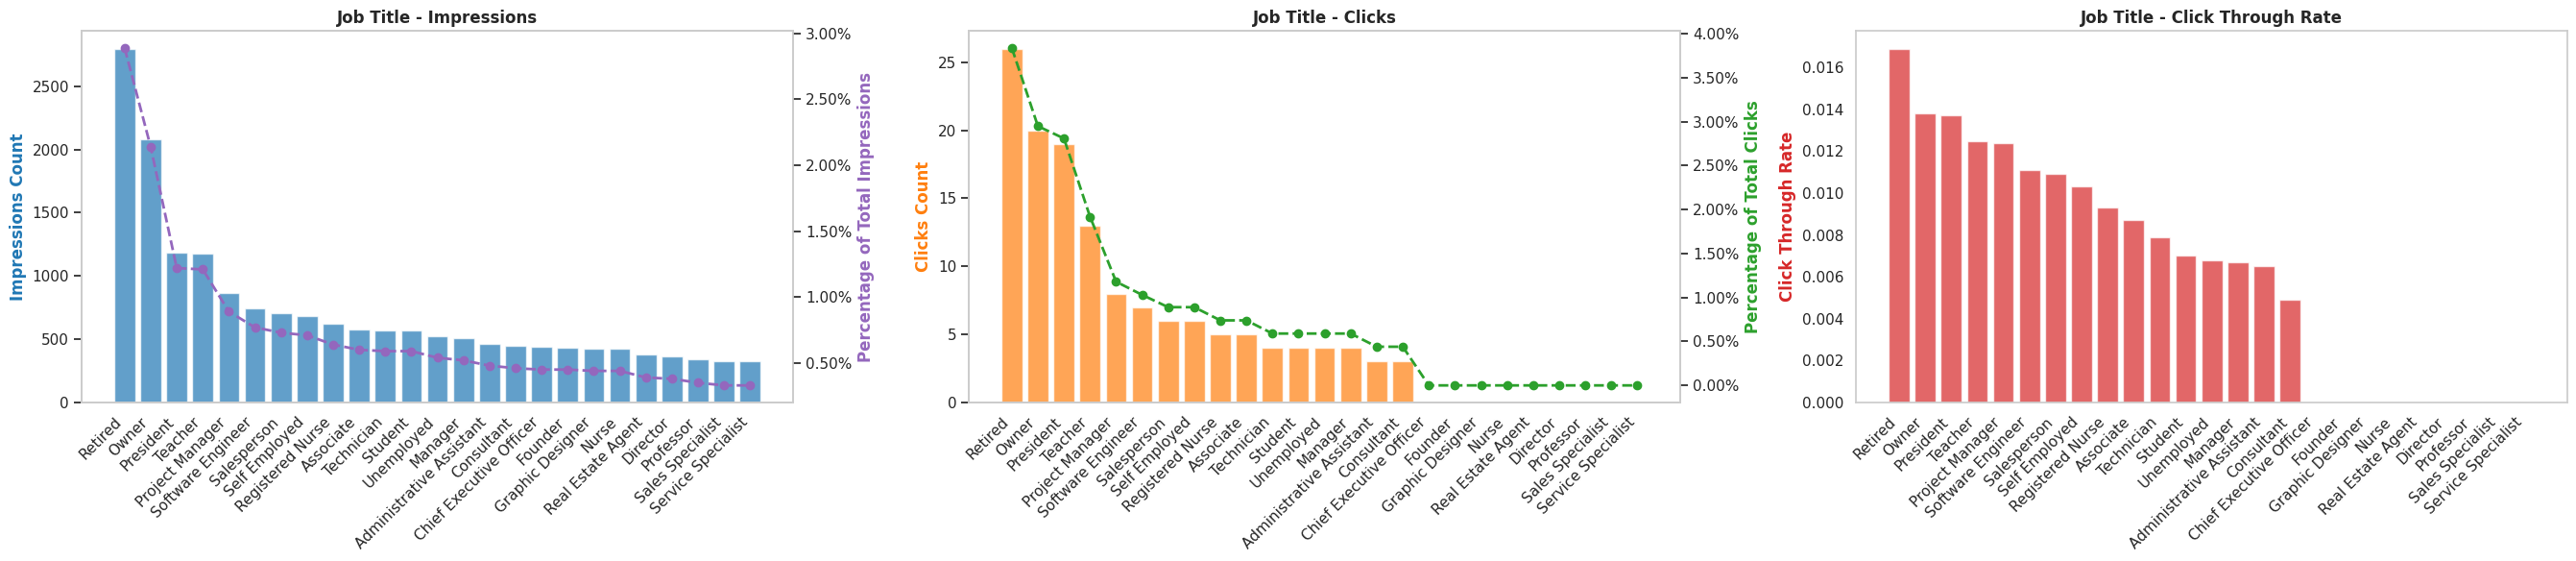

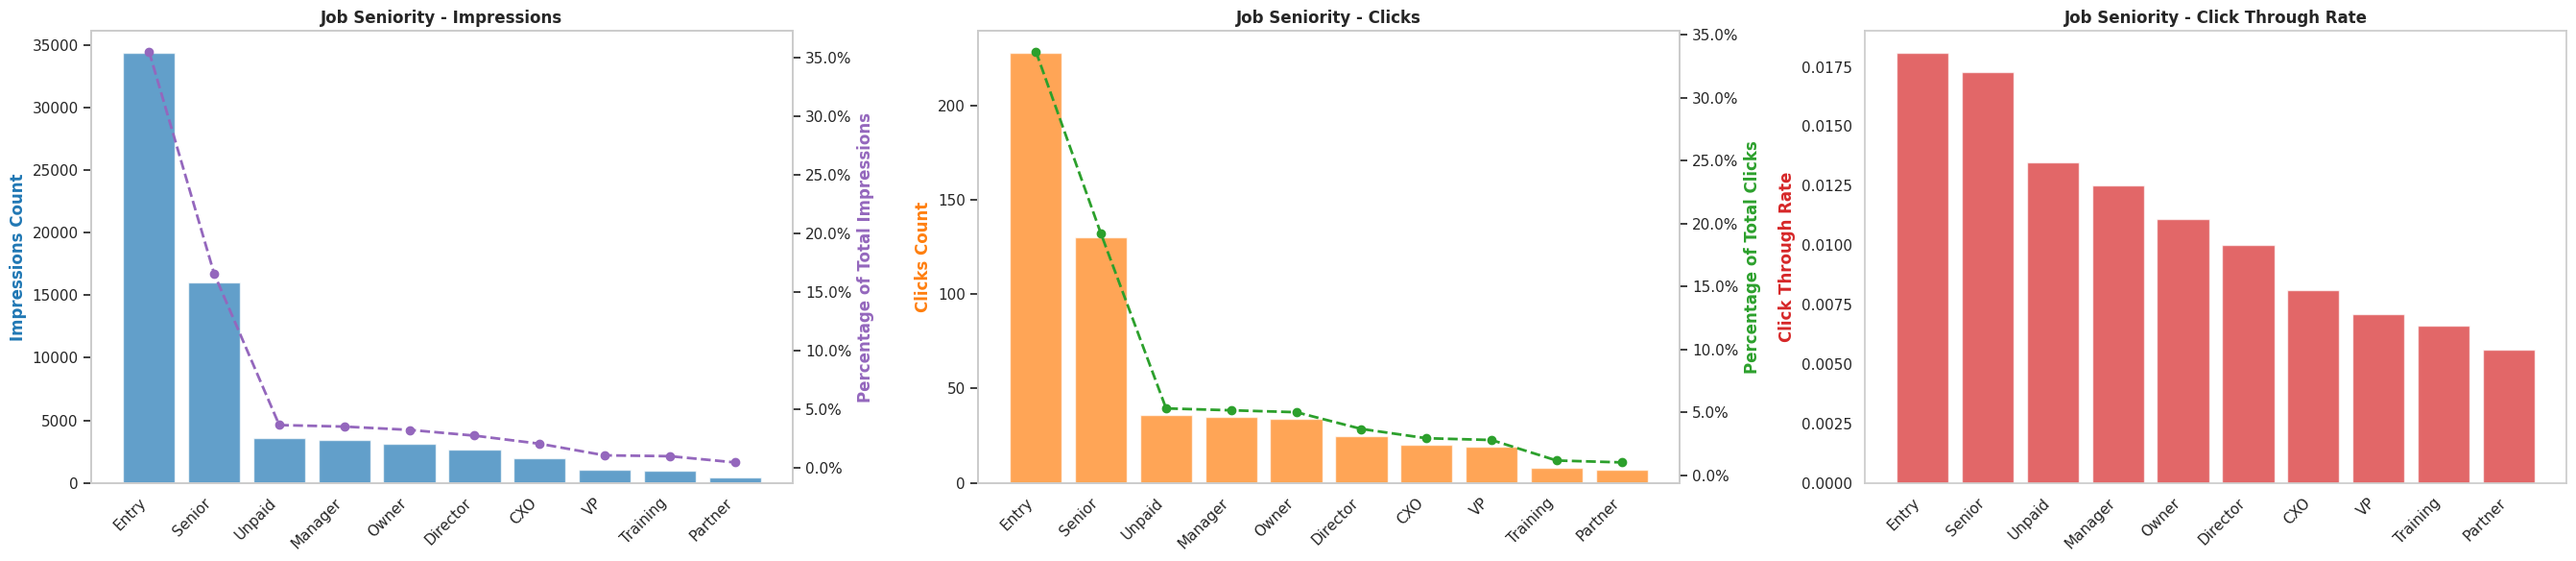

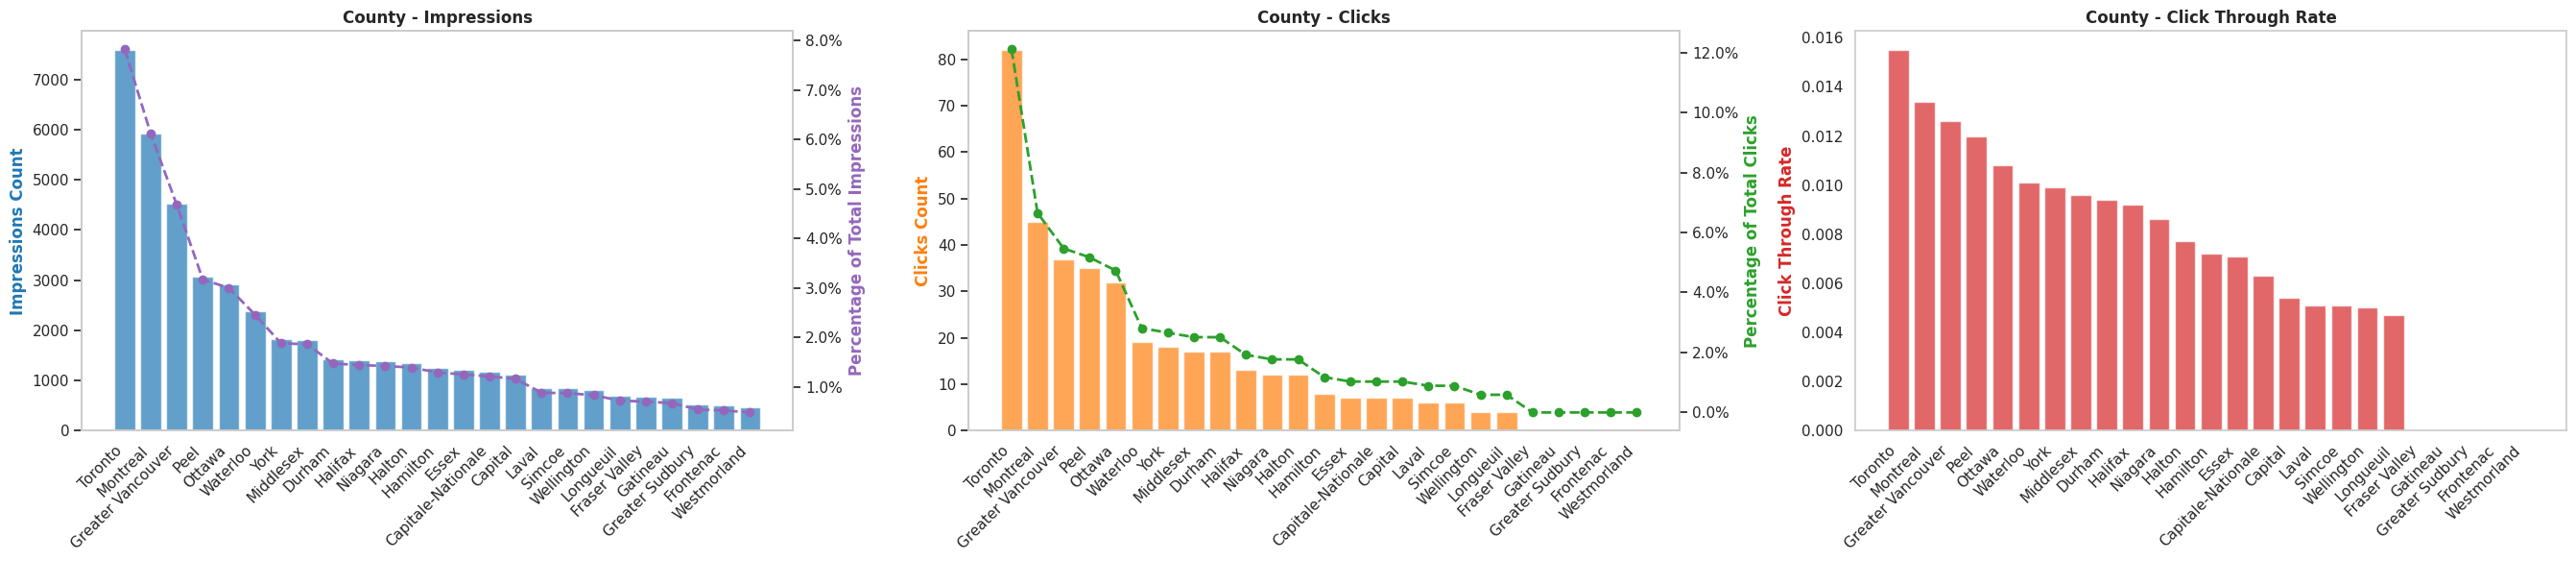

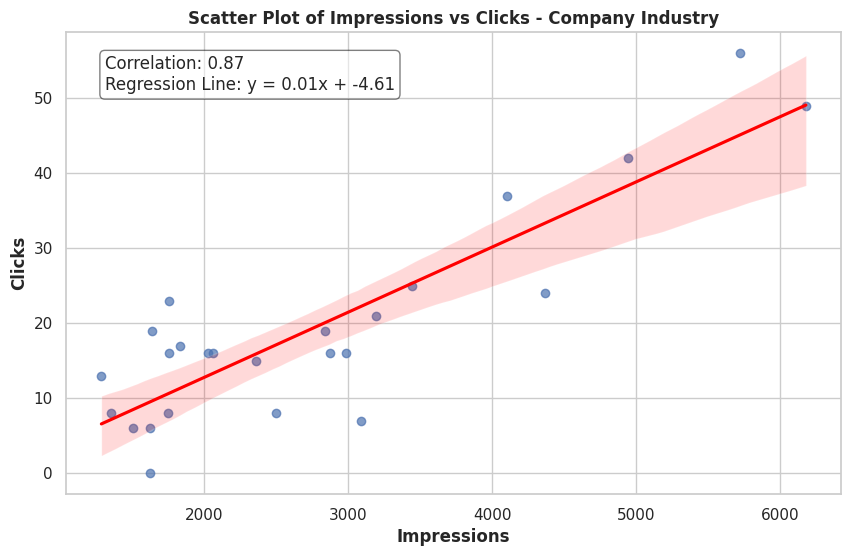

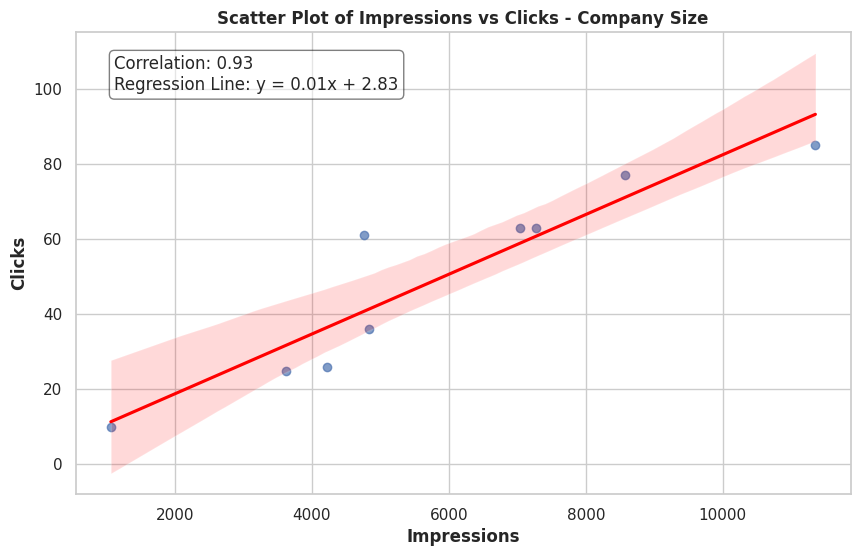

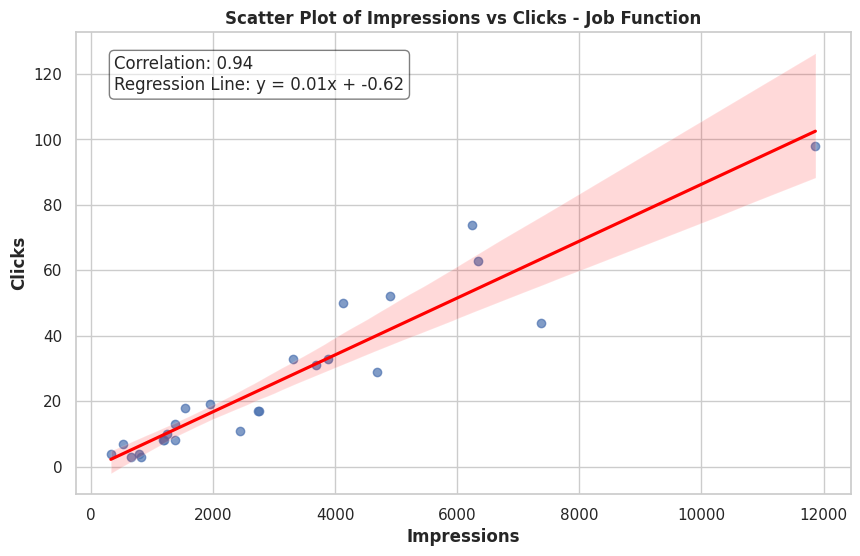

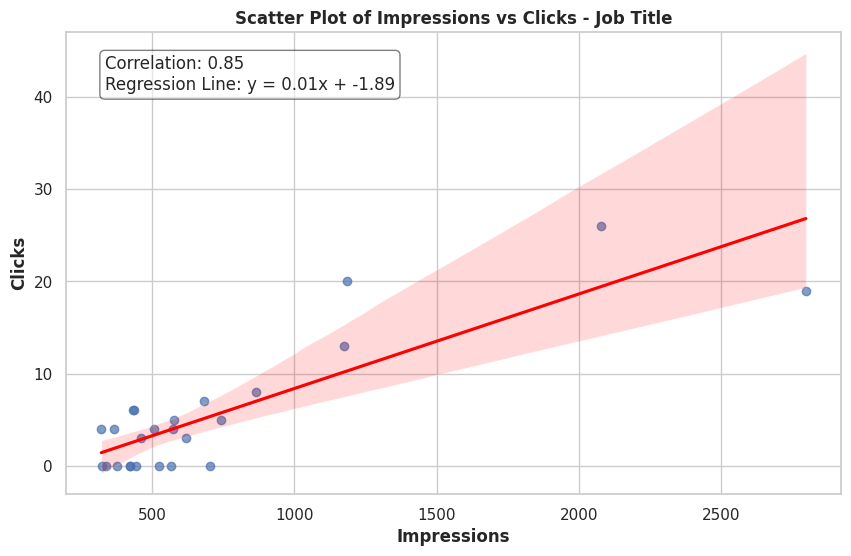

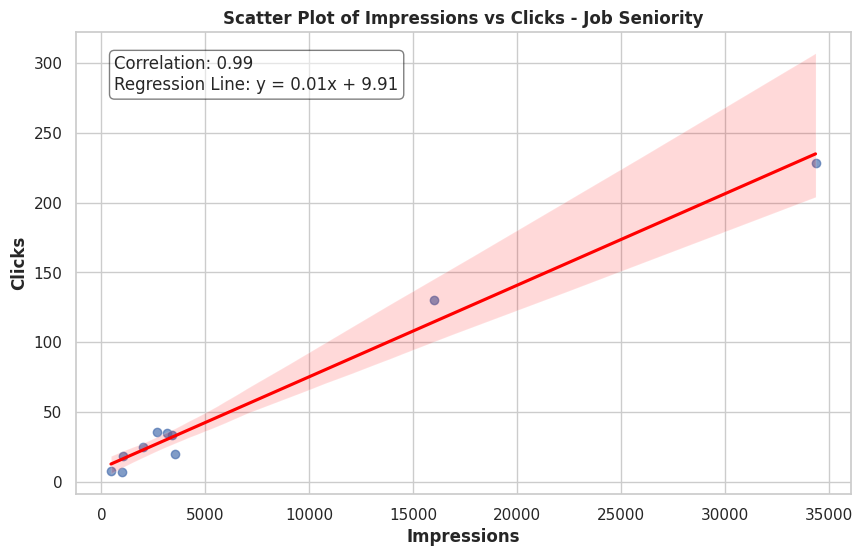

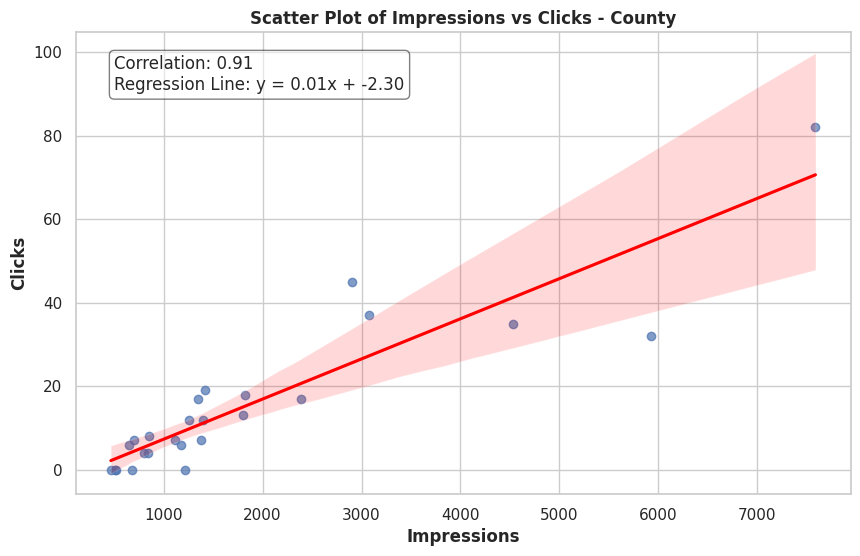



Top 5 Data Points for Company Industry:
+----+--------------------------------------+---------------+----------+----------------------+
|    |       Company Industry Segment       |  Impressions  |  Clicks  |  Click Through Rate  |
+====+======================================+===============+==========+======================+
| 0  | Technology, Information and Internet |     6177      |    49    |        0.79%         |
+----+--------------------------------------+---------------+----------+----------------------+
| 1  |    IT Services and IT Consulting     |     5719      |    56    |        0.98%         |
+----+--------------------------------------+---------------+----------+----------------------+
| 2  |           Higher Education           |     4944      |    42    |        0.85%         |
+----+--------------------------------------+---------------+----------+----------------------+
| 3  |      Hospitals and Health Care       |     4364      |    24    |        0.55%         

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from scipy.stats import linregress
from tabulate import tabulate

# Load the Excel file
file_path = '/content/LinkedIn Info Session Demographics.xlsx'
xls = pd.ExcelFile(file_path)

# Define the sheets we want to analyze
sheet_names = xls.sheet_names

# Initialize seaborn for plotting
sns.set(style="whitegrid")

# Define colors for better visual distinction
impressions_colors = ['#1f77b4', '#9467bd']  # Colors for Impressions and % of Total Impressions
clicks_colors = ['#ff7f0e', '#2ca02c']  # Colors for Clicks and % of Total Clicks
ctr_colors = ['#d62728', '#e377c2']  # Colors for CTR and % of Total CTR

# Section 1: Bar and Line Plots for Impressions, Clicks, and Click Through Rate (CTR)
for sheet in sheet_names:
    df = xls.parse(sheet_name=sheet)
    sorted_df_impressions = df.sort_values(by='Impressions', ascending=False)
    sorted_df_clicks = df.sort_values(by='Clicks', ascending=False)
    sorted_df_ctr = df.sort_values(by='Click Through Rate', ascending=False)

    # Create figure with three subplots for Impressions, Clicks, and Click Through Rate
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27, 6), dpi=100)

    # Impressions subplot
    ax1 = axes[0]
    ax1.bar(sorted_df_impressions.iloc[:, 0], sorted_df_impressions['Impressions'], color=impressions_colors[0], alpha=0.7)
    ax1.grid(False)  # Remove gridlines for primary axis
    ax1_twin = ax1.twinx()
    ax1_twin.plot(sorted_df_impressions.iloc[:, 0], sorted_df_impressions['Percent of Total Impressions'], color=impressions_colors[1], linestyle='--', linewidth=2, marker='o')
    ax1_twin.grid(False)  # Remove gridlines for twin axis
    ax1.set_title(f'{sheet} - Impressions', fontweight='bold')
    ax1.set_ylabel('Impressions Count', fontweight='bold')
    ax1.yaxis.label.set_color(impressions_colors[0])
    ax1_twin.set_ylabel('Percentage of Total Impressions', fontweight='bold')
    ax1_twin.yaxis.label.set_color(impressions_colors[1])
    ax1_twin.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

    # Clicks subplot
    ax2 = axes[1]
    ax2.bar(sorted_df_clicks.iloc[:, 0], sorted_df_clicks['Clicks'], color=clicks_colors[0], alpha=0.7)
    ax2.grid(False)  # Remove gridlines for primary axis
    ax2_twin = ax2.twinx()
    ax2_twin.plot(sorted_df_clicks.iloc[:, 0], sorted_df_clicks['Percent of Total Clicks'], color=clicks_colors[1], linestyle='--', linewidth=2, marker='o')
    ax2_twin.grid(False)  # Remove gridlines for twin axis
    ax2.set_title(f'{sheet} - Clicks', fontweight='bold')
    ax2.set_ylabel('Clicks Count', fontweight='bold')
    ax2.yaxis.label.set_color(clicks_colors[0])
    ax2_twin.set_ylabel('Percentage of Total Clicks', fontweight='bold')
    ax2_twin.yaxis.label.set_color(clicks_colors[1])
    ax2_twin.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

    # Click Through Rate (CTR) subplot
    ax3 = axes[2]
    ax3.bar(sorted_df_ctr.iloc[:, 0], sorted_df_ctr['Click Through Rate'], color=ctr_colors[0], alpha=0.7)
    ax3.grid(False)  # Remove gridlines for primary axis
    ax3.set_title(f'{sheet} - Click Through Rate', fontweight='bold')
    ax3.set_ylabel('Click Through Rate', fontweight='bold')
    ax3.yaxis.label.set_color(ctr_colors[0])

    # Set x-axis labels to prevent overlapping for all subplots
    for ax in [ax1, ax2, ax3]:
        ax.set_xticks(range(len(sorted_df_impressions)))
        ax.set_xticklabels(sorted_df_impressions.iloc[:, 0], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

print('\n')  # Add extra space between Sections


# Section 2: Scatter Plots with Regression Lines using Seaborn
for sheet in sheet_names:
    df = xls.parse(sheet_name=sheet)

    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df['Impressions'], df['Clicks'])

    # Initialize the matplotlib figure
    plt.figure(figsize=(10, 6))

    # Use Seaborn's regplot for plotting
    sns.regplot(x='Impressions', y='Clicks', data=df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

    # Annotate with the correlation coefficient and regression formula with a bounding box
    plt.annotate(f'Correlation: {r_value:.2f}\nRegression Line: y = {slope:.2f}x + {intercept:.2f}',
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=12, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

    # Set plot labels and title with bold font
    plt.xlabel('Impressions', fontweight='bold')
    plt.ylabel('Clicks', fontweight='bold')
    plt.title(f'Scatter Plot of Impressions vs Clicks - {sheet}', fontweight='bold')

    # Display the plot
    plt.show()

print('\n')  # Add extra space between Sections


# Section 3: Summary Tables of Top 5 Data Points
top_5_data_points = {}  # Initialize the dictionary for storing top 5 data points
for sheet in sheet_names:
    df = xls.parse(sheet_name=sheet)

    # Sort the dataframe to get the top 5 data points by Impressions, Clicks, and Click Through Rate
    df_sorted = df.sort_values(by=['Impressions', 'Clicks', 'Click Through Rate'], ascending=[False, False, False])

    # Get the top 5 data points
    top_5 = df_sorted.head(5).reset_index(drop=True)

    # CTR is in the 6th column (index 5), convert it to percentages and format it
    top_5.iloc[:, 5] = (top_5.iloc[:, 5] * 100).map("{:.2f}%".format)

    # Select the relevant columns
    top_5 = top_5.iloc[:, [0, 1, 3, 5]]

    # Store the top 5 data points in the dictionary
    top_5_data_points[sheet] = top_5

# Display the top 5 data points for each category in a tabular format using tabulate
for category, top_5_df in top_5_data_points.items():
    print(f"Top 5 Data Points for {category}:")
    print(tabulate(top_5_df, headers='keys', tablefmt='grid', numalign="center", stralign="center"))
    print('\n')  # Add extra space between tables


## Analysis and Recommendations

Based on the demographic visualizations and data analysis of our LinkedIn Info Session Campaign (2023-2024), the following analysis and recommendations are made to optimize & tailor for our next upcoming Info Session Campaigns:

### Company Industry
- **Analysis**: Industries such as Technology, IT Services, and Higher Education show high engagement in both impressions and clicks.
- **Recommendation**: Focus more of our time & budget creating personalized ads to these high-performing sectors and research tailored content that resonates with their interests.

### Company Size
- **Analysis**: Surprisingly larger organizations with 10001+ employees are more highly engaged, compared to small/medium-sized businesses.
- **Recommendation**: Diversify the marketing approach to cater not only to smaller "startup" organizations but to include both to the broad reach of large companies and the specialized needs of small/medium-sized businesses.

### Job Function
- **Analysis**: Surprisingly more business roles such as Operations and Business Development have shown greater interest compared to Engineering. This could be due to their roles in decision-making and seeking out business advice. Healthcare Services also contributes a large share, possibly due to MedTech and the rising importance of medical technologies.
- **Recommendation**: Focus on creating ads more tailored to business and decision-makers. Such as more success stories or ROI-focused content that can help professionals in these functions make informed decisions. Also increase effort in making more MedTech focused ads.

### Job Title
- **Analysis**: Senior roles such as Owners and Presidents are more engaged, likely looking for strategic insights and partnerships. This aligns with our observation in Job Function.
- **Recommendation**: Design content that addresses strategic business needs and offers long-term value propositions for these decision-makers.

### Job Seniority
- **Analysis**: A significant amount of engagement comes from Entry and Senior-level professionals, suggesting that both new entrants and experienced individuals are seeking business scale-up opportunities.
- **Recommendation**: Create a mix of content that provides both educational material (like a blog) for those starting their careers and thought leadership for more experienced professionals.

### Country
- **Analysis**: Toronto, Montreal, and Vancouver lead in engagement metrics, indicating regional interest.
- **Recommendation**: Consider adding languages in our marketing campaigns that are localized for these top-performing areas to capitalize on local interest, such as French, Mandarin, and Cantonese.

### Final Thoughts
The observed data presents a strong correlation between Impressions and Clicks across all demographics, underscoring a clear trend: as visibility increases, so does clicks. While we have yet to measure form submissions by demographic, the insights gained so far underscore the importance of not only extending our reach but also refining our website's user experience. By ensuring our site is both navigable/accessible, and finely tuned to the needs and interests of our target demographics, we stand to not only attract but also retain interest, thereby enhancing conversion rates. The data points us towards a strategy that marries reach with relevance — a combination that is likely to yield substantial improvements in our upcoming conversion metrics.

/var/folders/rw/gnby4y6s04zfvhbj14twm8_h0000gn/T/ipykernel_43102/1787566263.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(sheet_names))


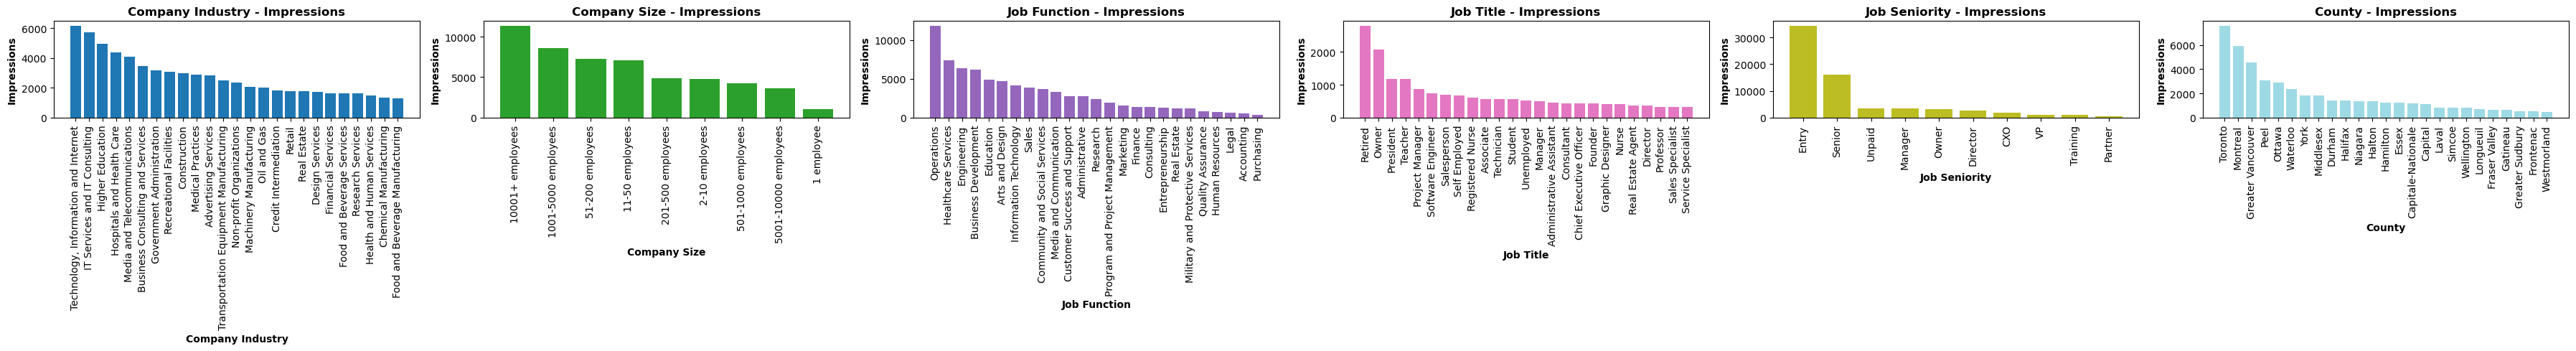

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker

# Load the Excel file
file_path = '/Users/jiholamberti/Downloads/LinkedIn Demographics.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

# Define colors for each sheet to distinguish them in the plot
colors = plt.cm.get_cmap('tab20', len(sheet_names))

# Calculate the number of columns for subplots based on the number of sheets.
num_columns = len(sheet_names)
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(num_columns * 6, 5), dpi=100)

# If there's only one sheet, axes won't be an array, so we wrap it in a list to make it iterable.
if len(sheet_names) == 1:
    axes = [axes]

# Plot data for each sheet
for idx, (sheet, ax) in enumerate(zip(sheet_names, axes)):
    df = pd.read_excel(xls, sheet_name=sheet)
    sorted_df_impressions = df.sort_values(by='Impressions', ascending=False)

    # Plot the bar for the 'Impressions' with the corresponding sheet
    ax.bar(sorted_df_impressions.iloc[:, 0], sorted_df_impressions['Impressions'], color=colors.colors[idx])

    # Set titles and labels for each subplot
    ax.set_title(f'{sheet} - Impressions', fontweight='bold')
    ax.set_xlabel(f'{sheet}', fontweight='bold')
    ax.set_ylabel('Impressions', fontweight='bold')
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adjust the layout
plt.tight_layout()
plt.show()

# <center>LinkedIn Hardware Catalyst Initiative (HCI) - Demographic Analysis</center>

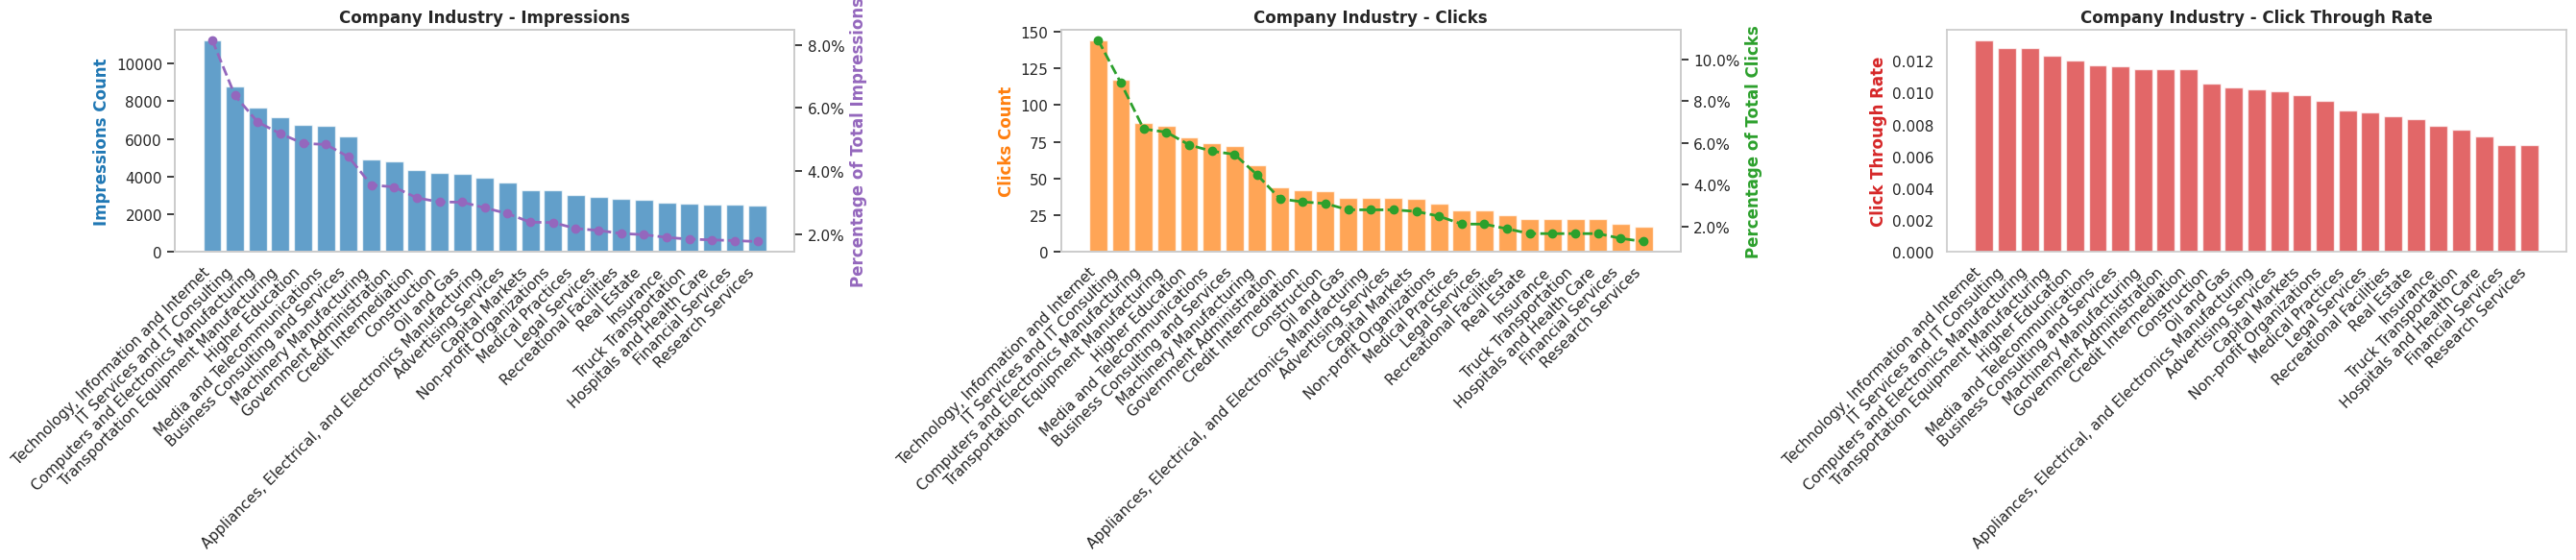

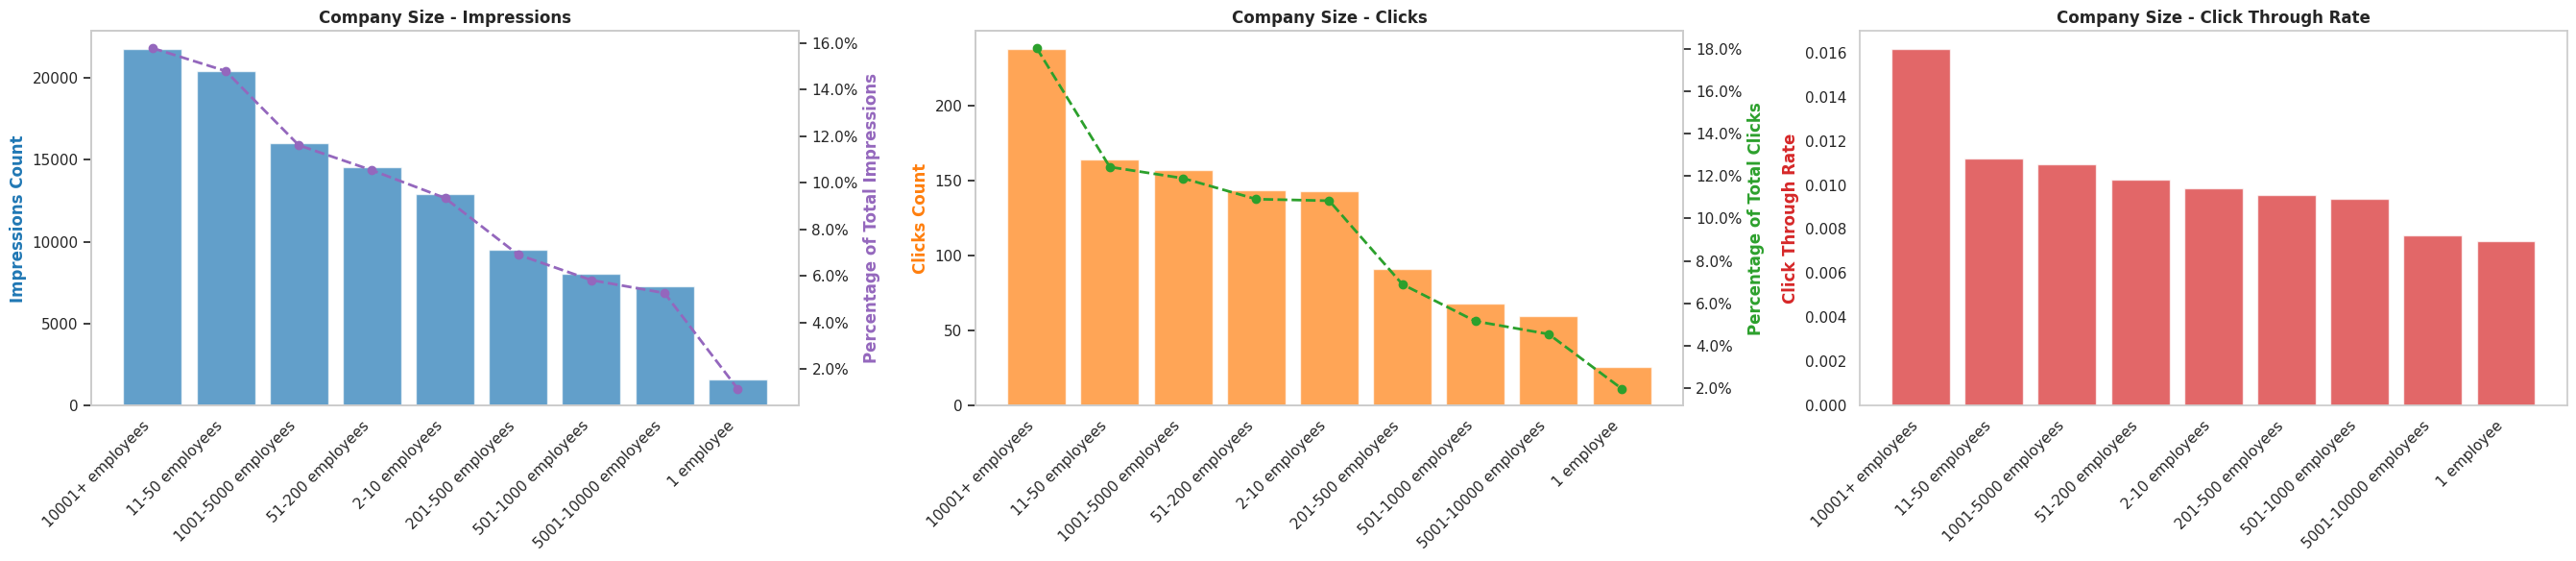

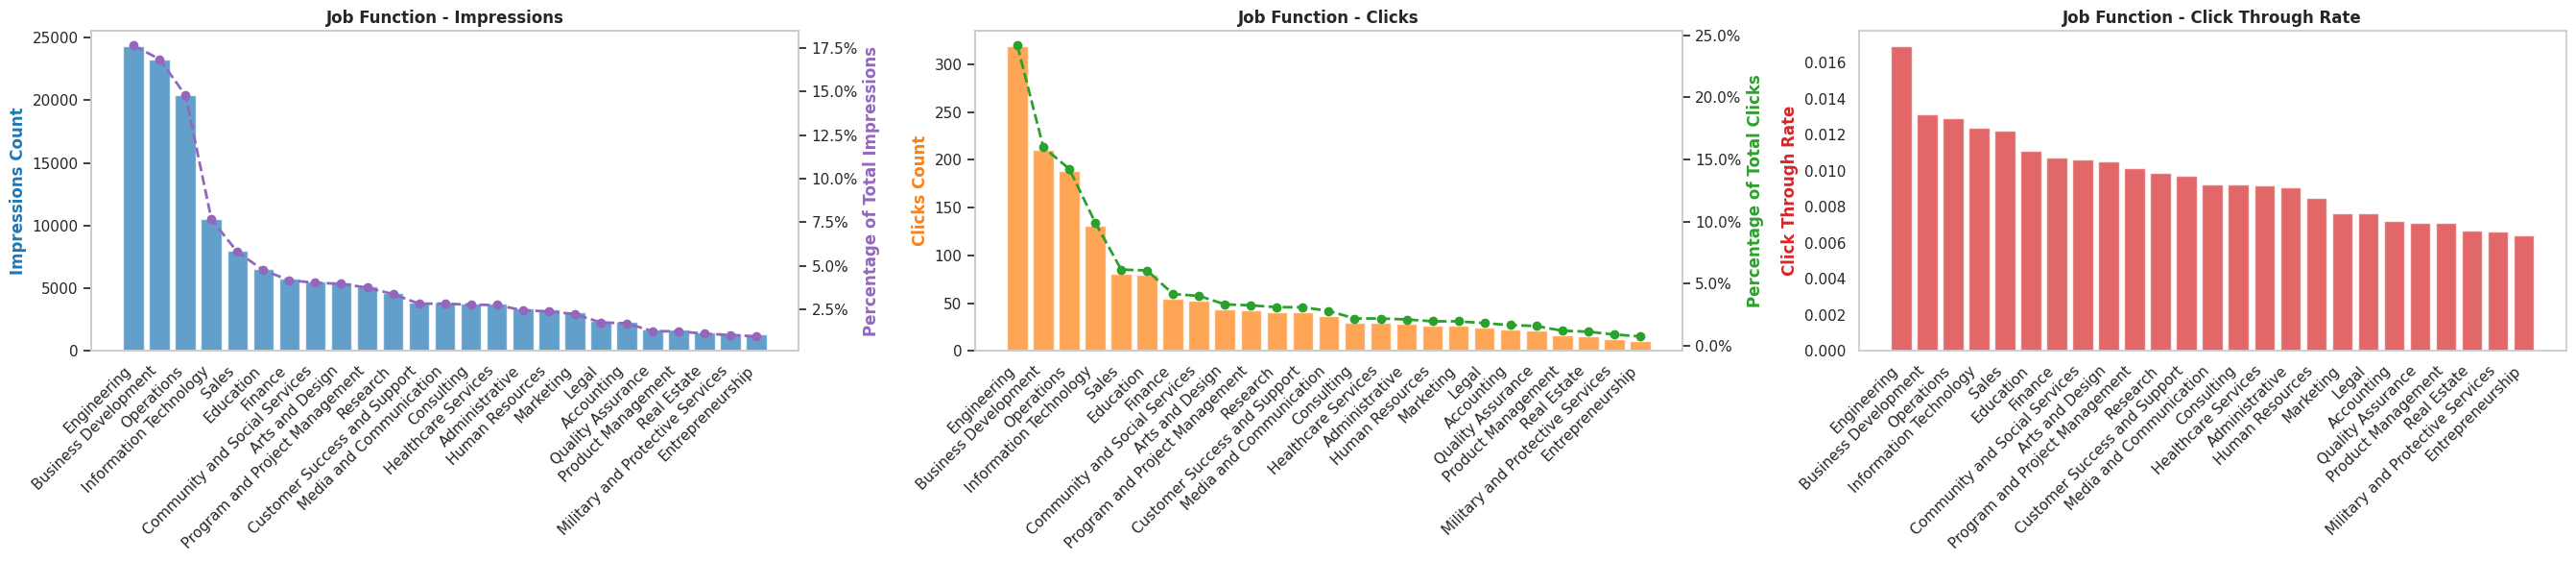

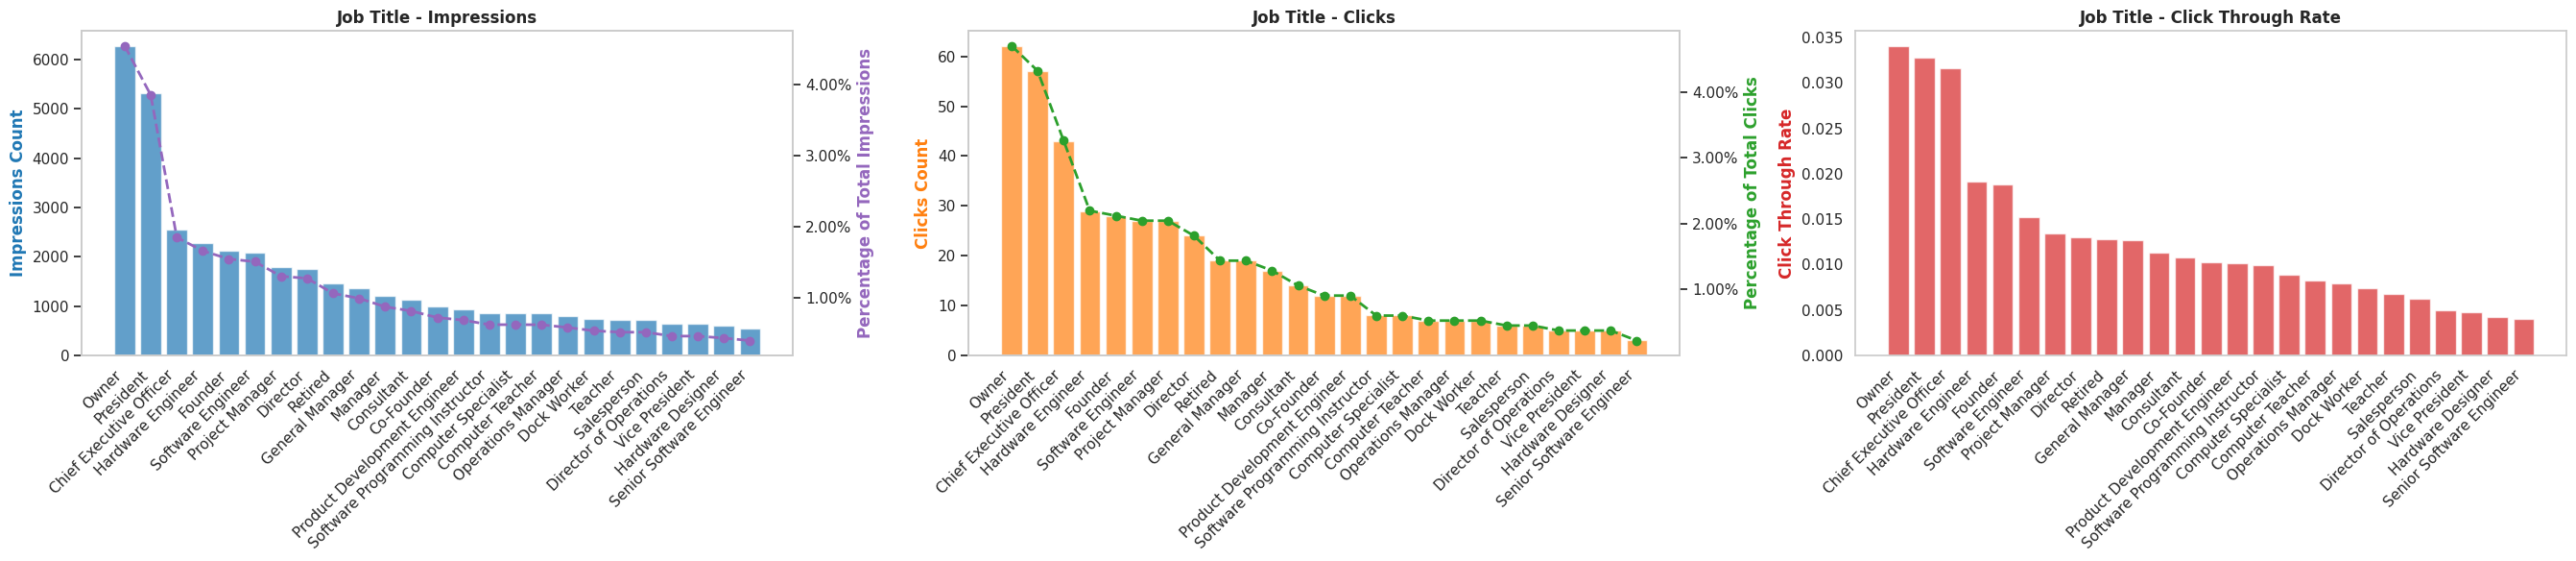

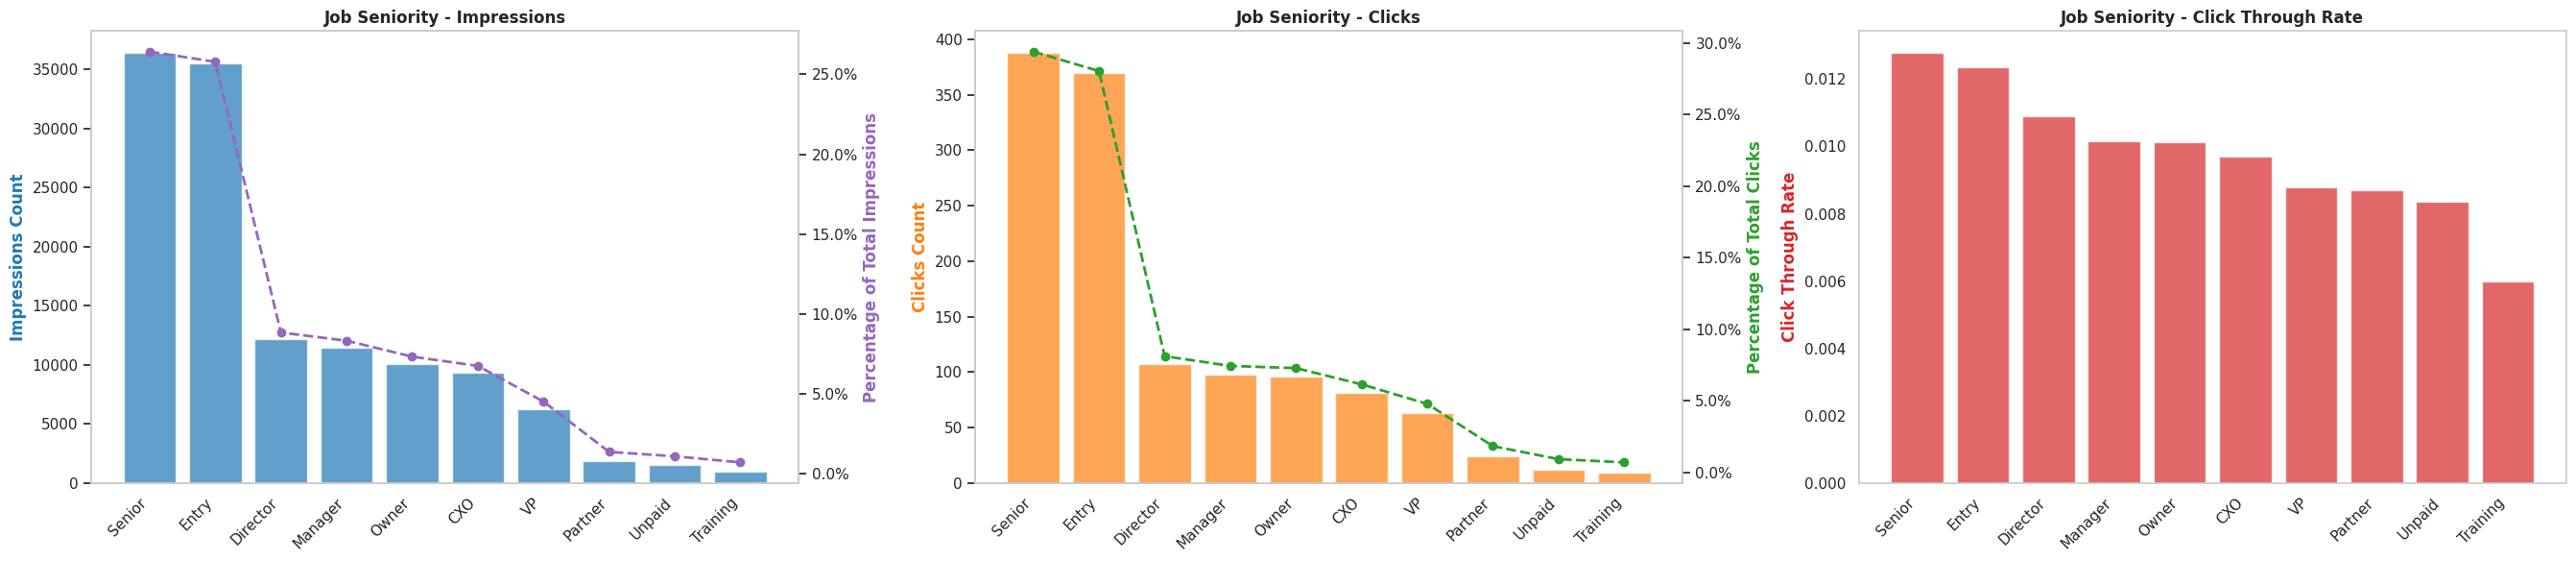

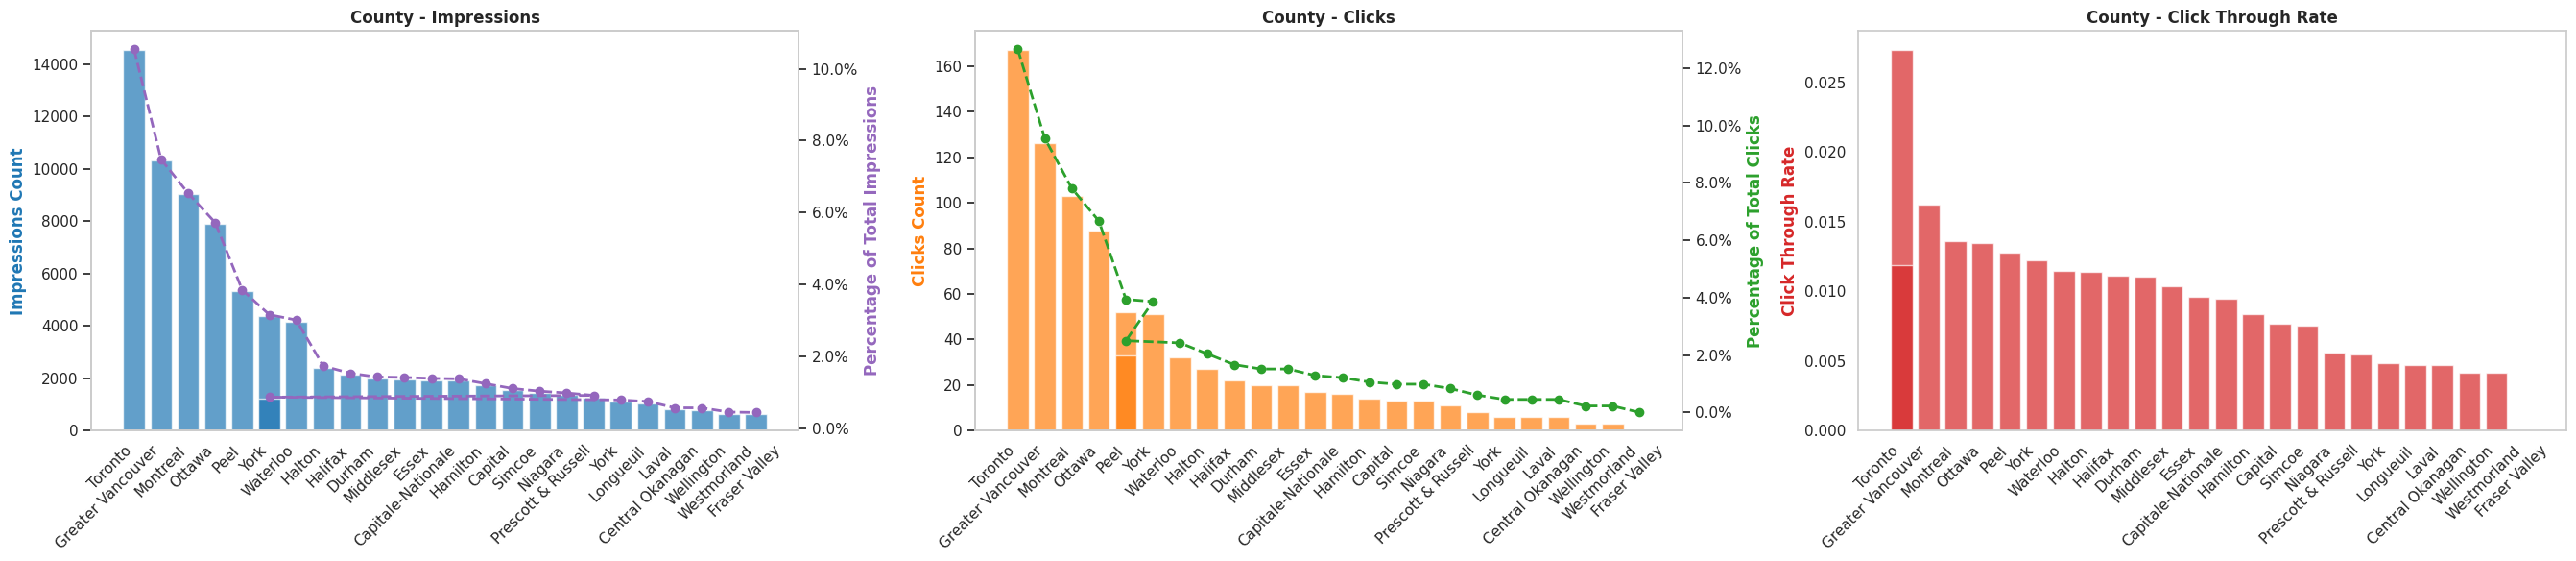

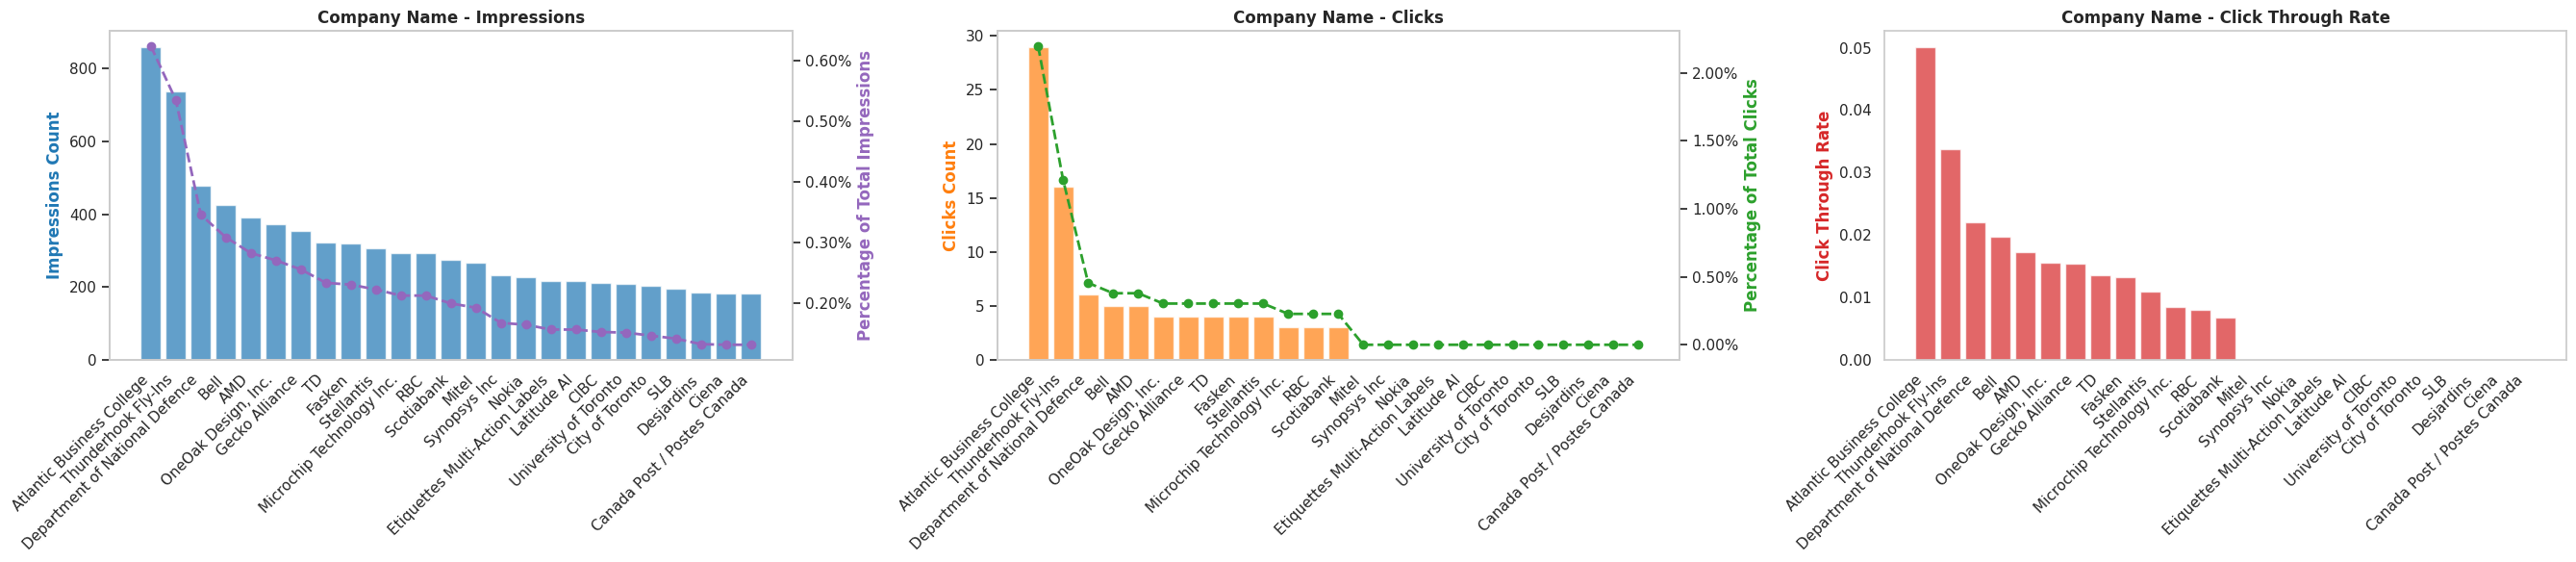

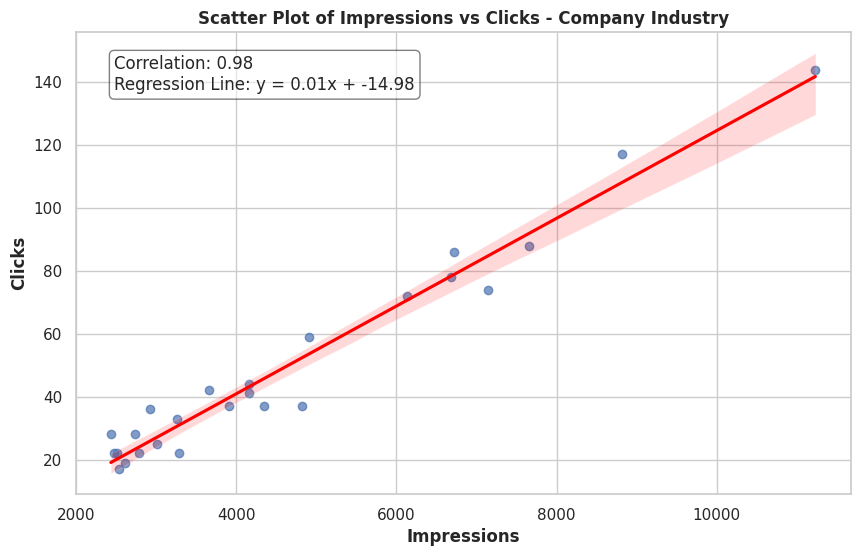

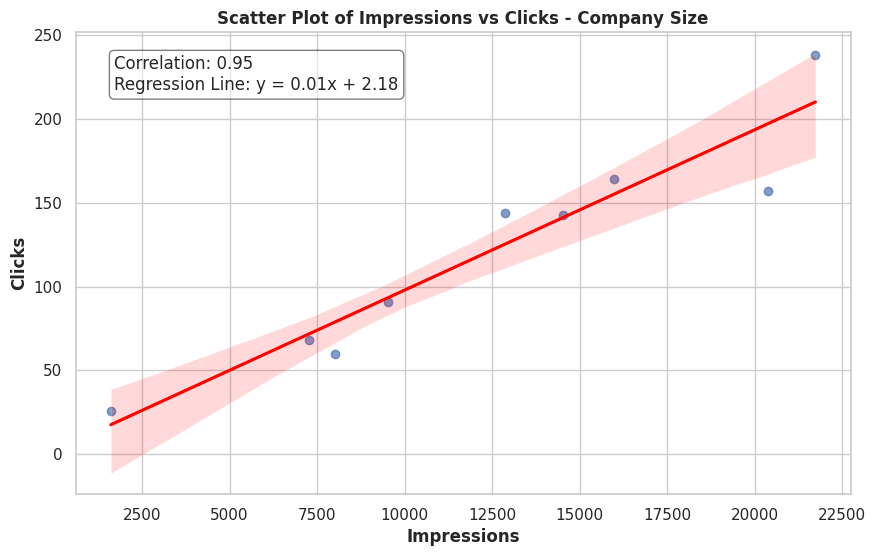

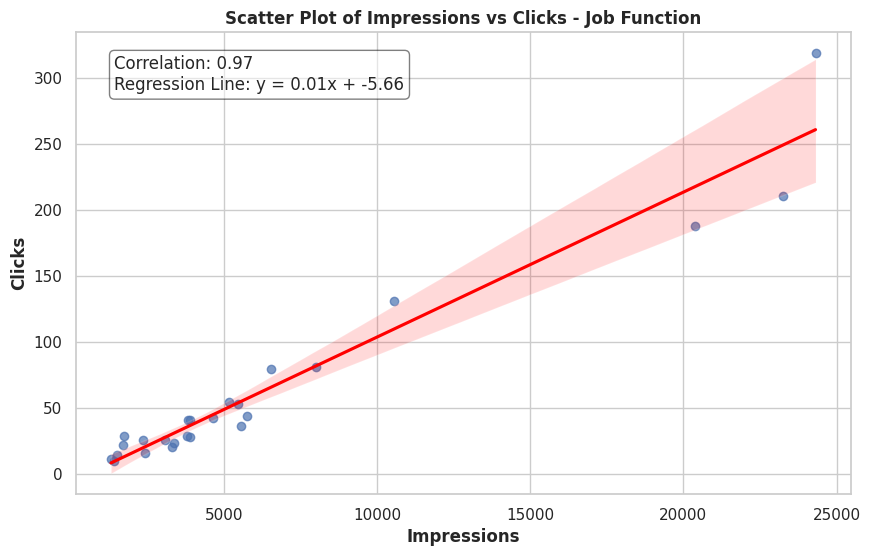

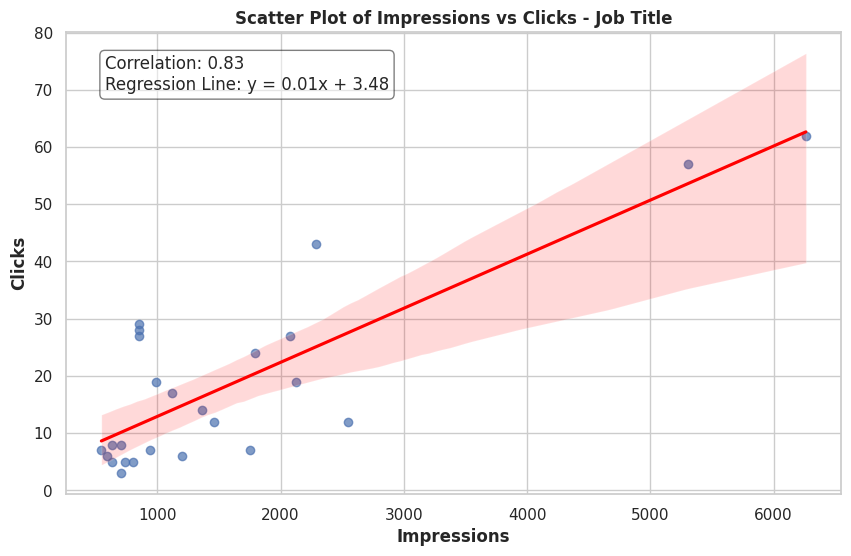

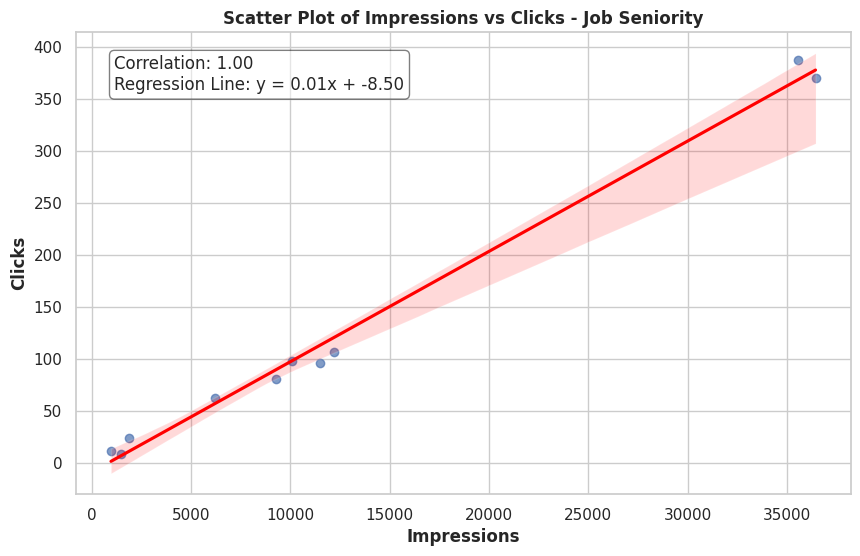

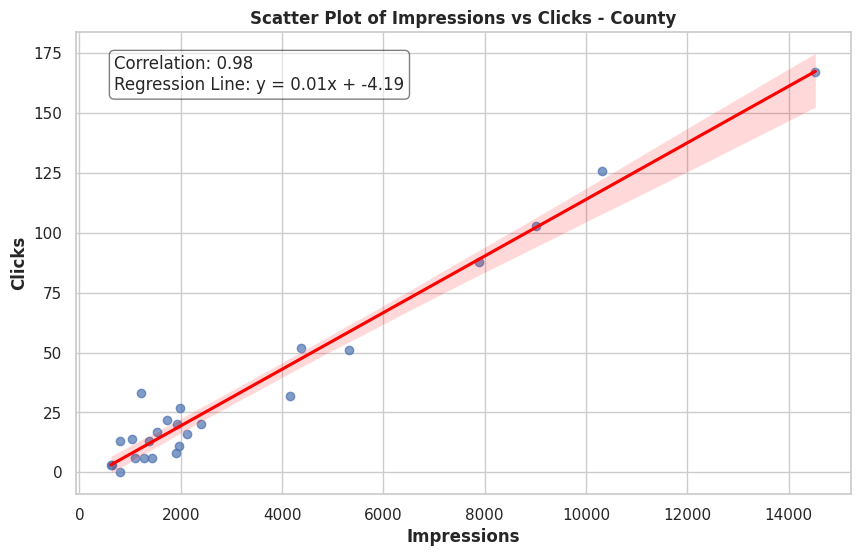

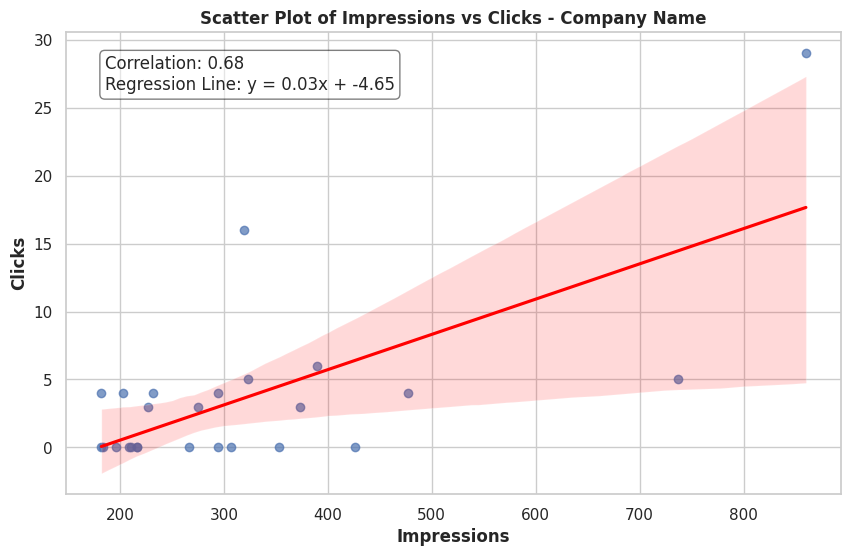



Top 5 Data Points for Company Industry:
+----+-----------------------------------------+---------------+----------+----------------------+
|    |        Company Industry Segment         |  Impressions  |  Clicks  |  Click Through Rate  |
+====+=========================================+===============+==========+======================+
| 0  |  Technology, Information and Internet   |     11231     |   144    |        1.28%         |
+----+-----------------------------------------+---------------+----------+----------------------+
| 1  |      IT Services and IT Consulting      |     8814      |   117    |        1.33%         |
+----+-----------------------------------------+---------------+----------+----------------------+
| 2  | Computers and Electronics Manufacturing |     7654      |    88    |        1.15%         |
+----+-----------------------------------------+---------------+----------+----------------------+
| 3  | Transportation Equipment Manufacturing  |     7147      |   

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from scipy.stats import linregress
from tabulate import tabulate

# Load the Excel file
file_path = '/content/LinkedIn HCI Demographic.xlsx'
xls = pd.ExcelFile(file_path)

# Define the sheets we want to analyze
sheet_names = xls.sheet_names

# Initialize seaborn for plotting
sns.set(style="whitegrid")

# Define colors for better visual distinction
impressions_colors = ['#1f77b4', '#9467bd']  # Colors for Impressions and % of Total Impressions
clicks_colors = ['#ff7f0e', '#2ca02c']  # Colors for Clicks and % of Total Clicks
ctr_colors = ['#d62728', '#e377c2']  # Colors for CTR and % of Total CTR

# Section 1: Bar and Line Plots for Impressions, Clicks, and Click Through Rate (CTR)
for sheet in sheet_names:
    df = xls.parse(sheet_name=sheet)
    sorted_df_impressions = df.sort_values(by='Impressions', ascending=False)
    sorted_df_clicks = df.sort_values(by='Clicks', ascending=False)
    sorted_df_ctr = df.sort_values(by='Click Through Rate', ascending=False)

    # Create figure with three subplots for Impressions, Clicks, and Click Through Rate
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27, 6), dpi=100)

    # Impressions subplot
    ax1 = axes[0]
    ax1.bar(sorted_df_impressions.iloc[:, 0], sorted_df_impressions['Impressions'], color=impressions_colors[0], alpha=0.7)
    ax1.grid(False)  # Remove gridlines for primary axis
    ax1_twin = ax1.twinx()
    ax1_twin.plot(sorted_df_impressions.iloc[:, 0], sorted_df_impressions['Percent of Total Impressions'], color=impressions_colors[1], linestyle='--', linewidth=2, marker='o')
    ax1_twin.grid(False)  # Remove gridlines for twin axis
    ax1.set_title(f'{sheet} - Impressions', fontweight='bold')
    ax1.set_ylabel('Impressions Count', fontweight='bold')
    ax1.yaxis.label.set_color(impressions_colors[0])
    ax1_twin.set_ylabel('Percentage of Total Impressions', fontweight='bold')
    ax1_twin.yaxis.label.set_color(impressions_colors[1])
    ax1_twin.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

    # Clicks subplot
    ax2 = axes[1]
    ax2.bar(sorted_df_clicks.iloc[:, 0], sorted_df_clicks['Clicks'], color=clicks_colors[0], alpha=0.7)
    ax2.grid(False)  # Remove gridlines for primary axis
    ax2_twin = ax2.twinx()
    ax2_twin.plot(sorted_df_clicks.iloc[:, 0], sorted_df_clicks['Percent of Total Clicks'], color=clicks_colors[1], linestyle='--', linewidth=2, marker='o')
    ax2_twin.grid(False)  # Remove gridlines for twin axis
    ax2.set_title(f'{sheet} - Clicks', fontweight='bold')
    ax2.set_ylabel('Clicks Count', fontweight='bold')
    ax2.yaxis.label.set_color(clicks_colors[0])
    ax2_twin.set_ylabel('Percentage of Total Clicks', fontweight='bold')
    ax2_twin.yaxis.label.set_color(clicks_colors[1])
    ax2_twin.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

    # Click Through Rate (CTR) subplot
    ax3 = axes[2]
    ax3.bar(sorted_df_ctr.iloc[:, 0], sorted_df_ctr['Click Through Rate'], color=ctr_colors[0], alpha=0.7)
    ax3.grid(False)  # Remove gridlines for primary axis
    ax3.set_title(f'{sheet} - Click Through Rate', fontweight='bold')
    ax3.set_ylabel('Click Through Rate', fontweight='bold')
    ax3.yaxis.label.set_color(ctr_colors[0])

    # Set x-axis labels to prevent overlapping for all subplots
    for ax in [ax1, ax2, ax3]:
        ax.set_xticks(range(len(sorted_df_impressions)))
        ax.set_xticklabels(sorted_df_impressions.iloc[:, 0], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

print('\n')  # Add extra space between Sections


# Section 2: Scatter Plots with Regression Lines using Seaborn
for sheet in sheet_names:
    df = xls.parse(sheet_name=sheet)

    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df['Impressions'], df['Clicks'])

    # Initialize the matplotlib figure
    plt.figure(figsize=(10, 6))

    # Use Seaborn's regplot for plotting
    sns.regplot(x='Impressions', y='Clicks', data=df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

    # Annotate with the correlation coefficient and regression formula with a bounding box
    plt.annotate(f'Correlation: {r_value:.2f}\nRegression Line: y = {slope:.2f}x + {intercept:.2f}',
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=12, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

    # Set plot labels and title with bold font
    plt.xlabel('Impressions', fontweight='bold')
    plt.ylabel('Clicks', fontweight='bold')
    plt.title(f'Scatter Plot of Impressions vs Clicks - {sheet}', fontweight='bold')

    # Display the plot
    plt.show()

print('\n')  # Add extra space between Sections


# Section 3: Summary Tables of Top 5 Data Points
top_5_data_points = {}  # Initialize the dictionary for storing top 5 data points
for sheet in sheet_names:
    df = xls.parse(sheet_name=sheet)

    # Sort the dataframe to get the top 5 data points by Impressions, Clicks, and Click Through Rate
    df_sorted = df.sort_values(by=['Impressions', 'Clicks', 'Click Through Rate'], ascending=[False, False, False])

    # Get the top 5 data points
    top_5 = df_sorted.head(5).reset_index(drop=True)

    # CTR is in the 6th column (index 5), convert it to percentages and format it
    top_5.iloc[:, 5] = (top_5.iloc[:, 5] * 100).map("{:.2f}%".format)

    # Select the relevant columns
    top_5 = top_5.iloc[:, [0, 1, 3, 5]]

    # Store the top 5 data points in the dictionary
    top_5_data_points[sheet] = top_5

# Display the top 5 data points for each category in a tabular format using tabulate
for category, top_5_df in top_5_data_points.items():
    print(f"Top 5 Data Points for {category}:")
    print(tabulate(top_5_df, headers='keys', tablefmt='grid', numalign="center", stralign="center"))
    print('\n')  # Add extra space between tables


# LinkedIn Canada Catalyst (CC) - Demographic Analysis

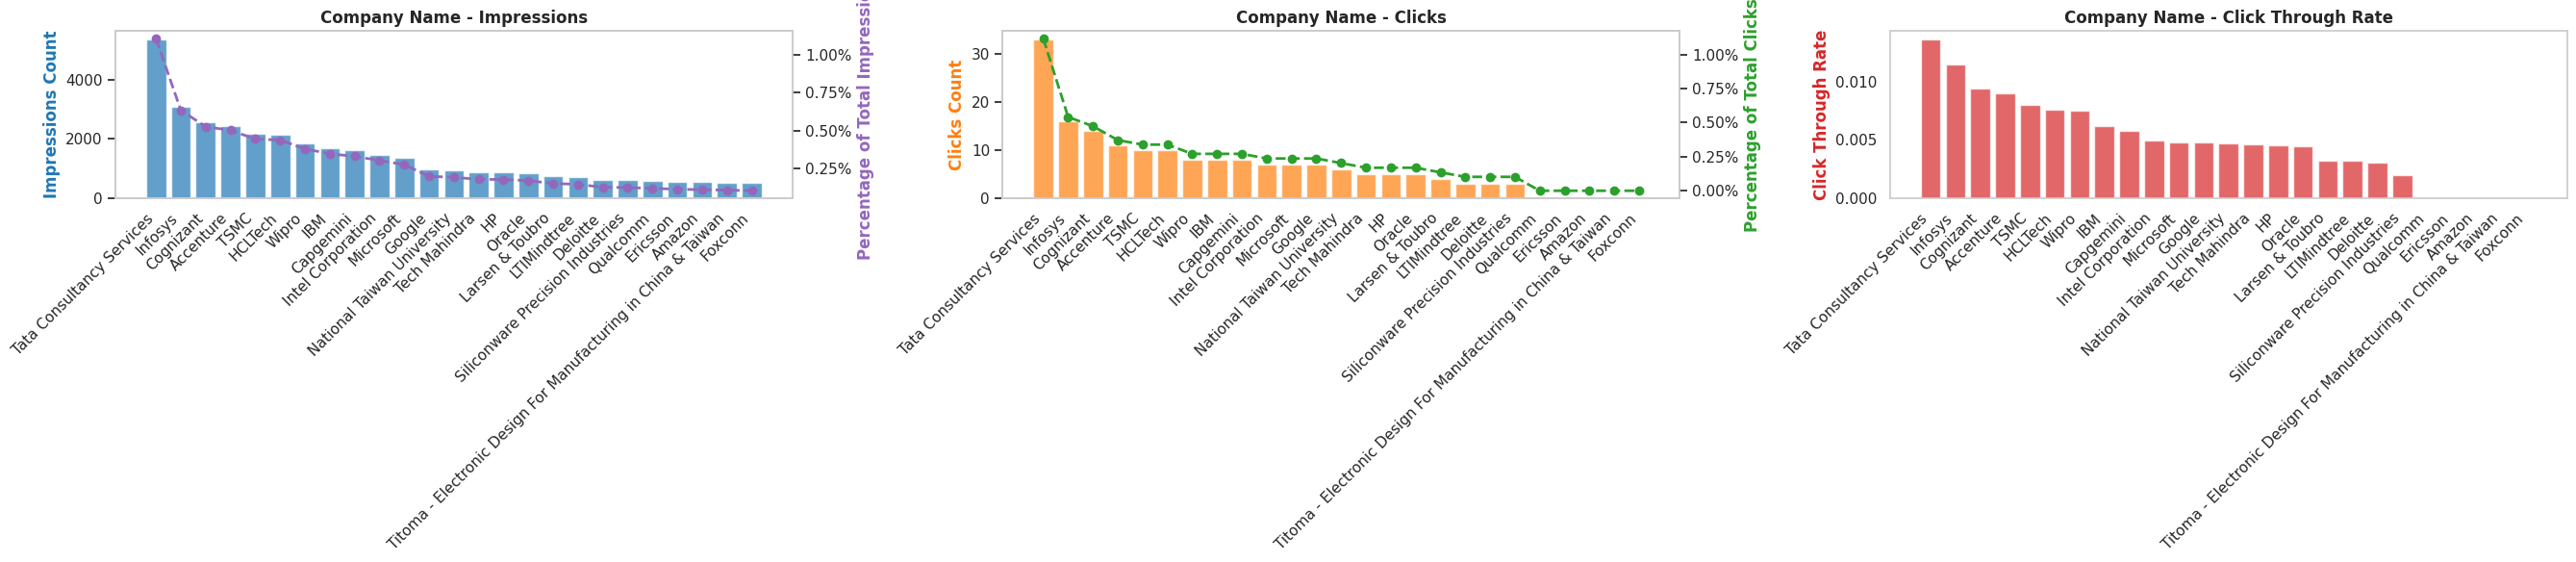

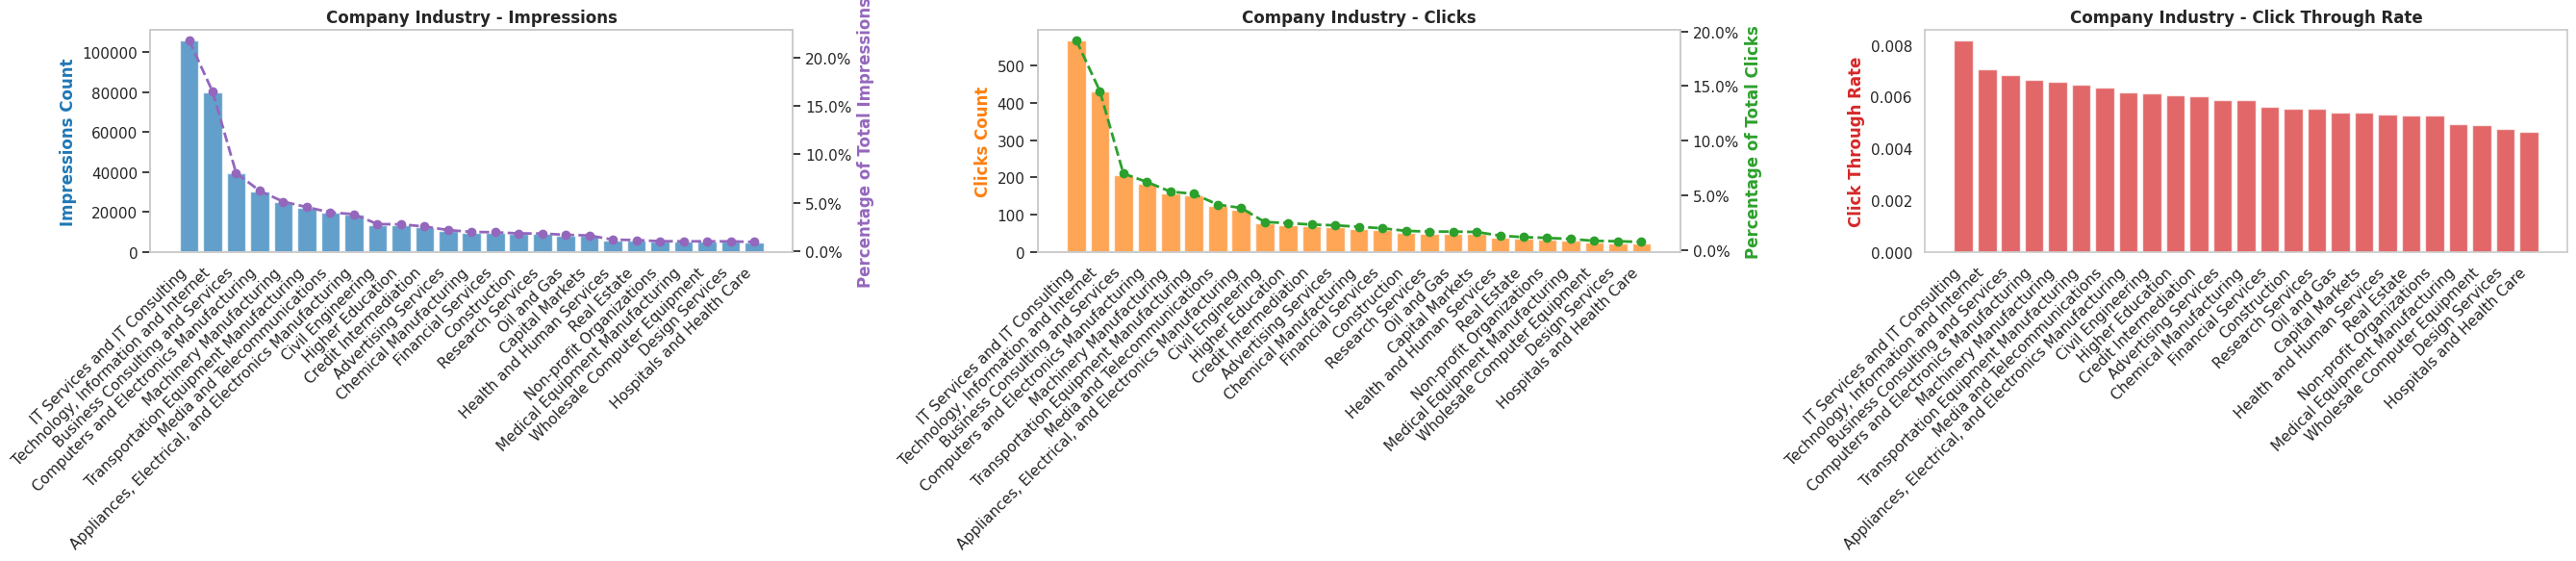

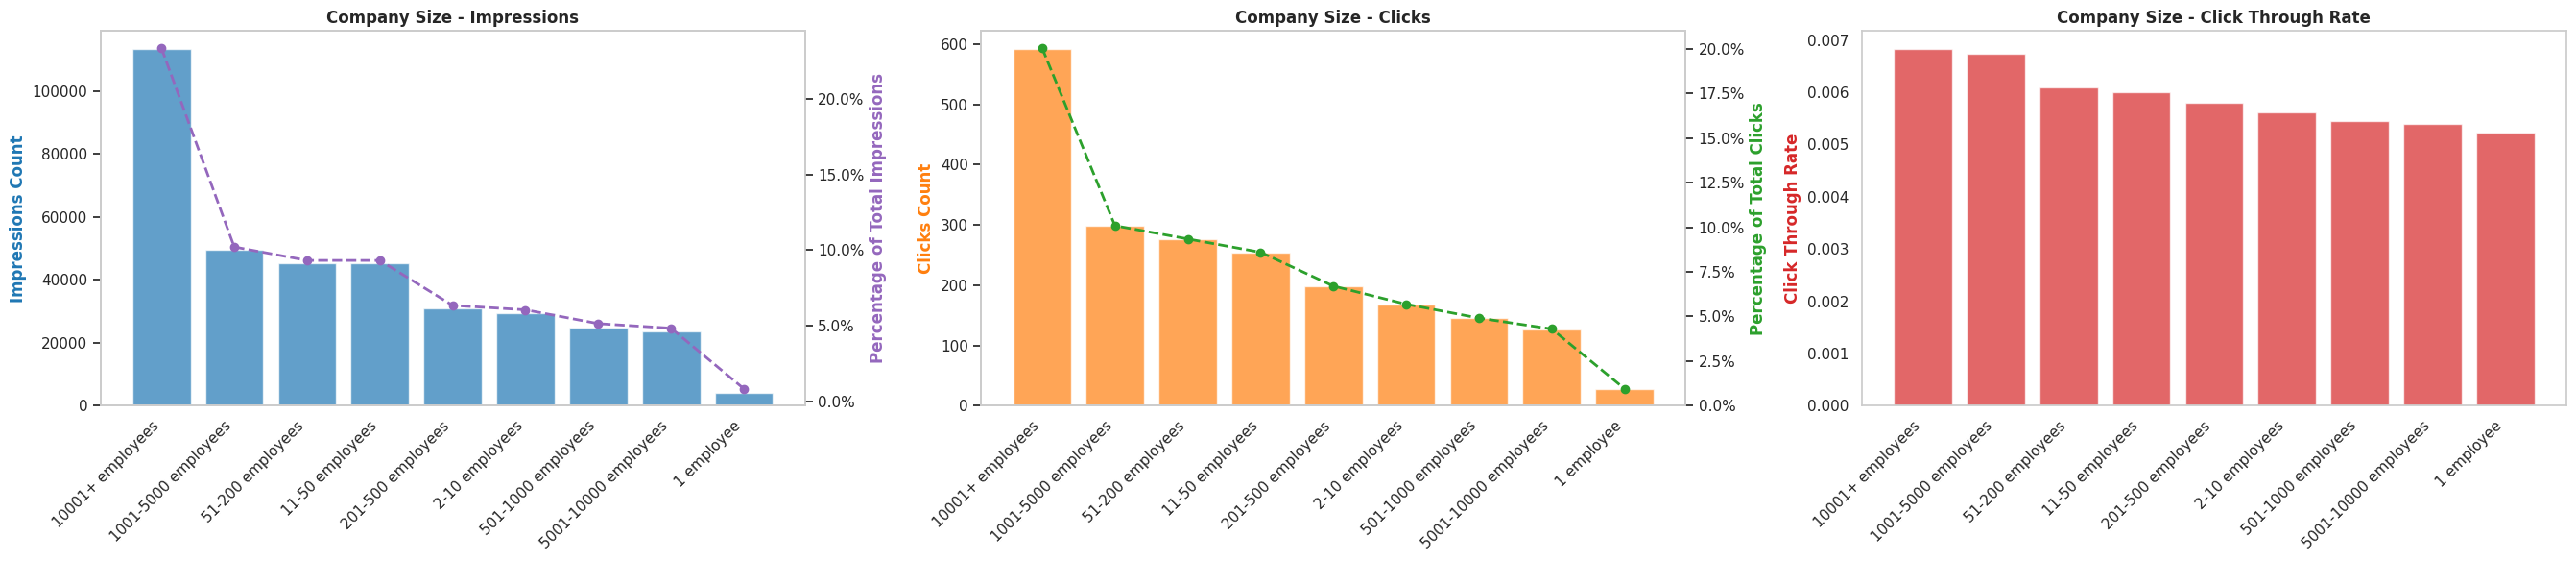

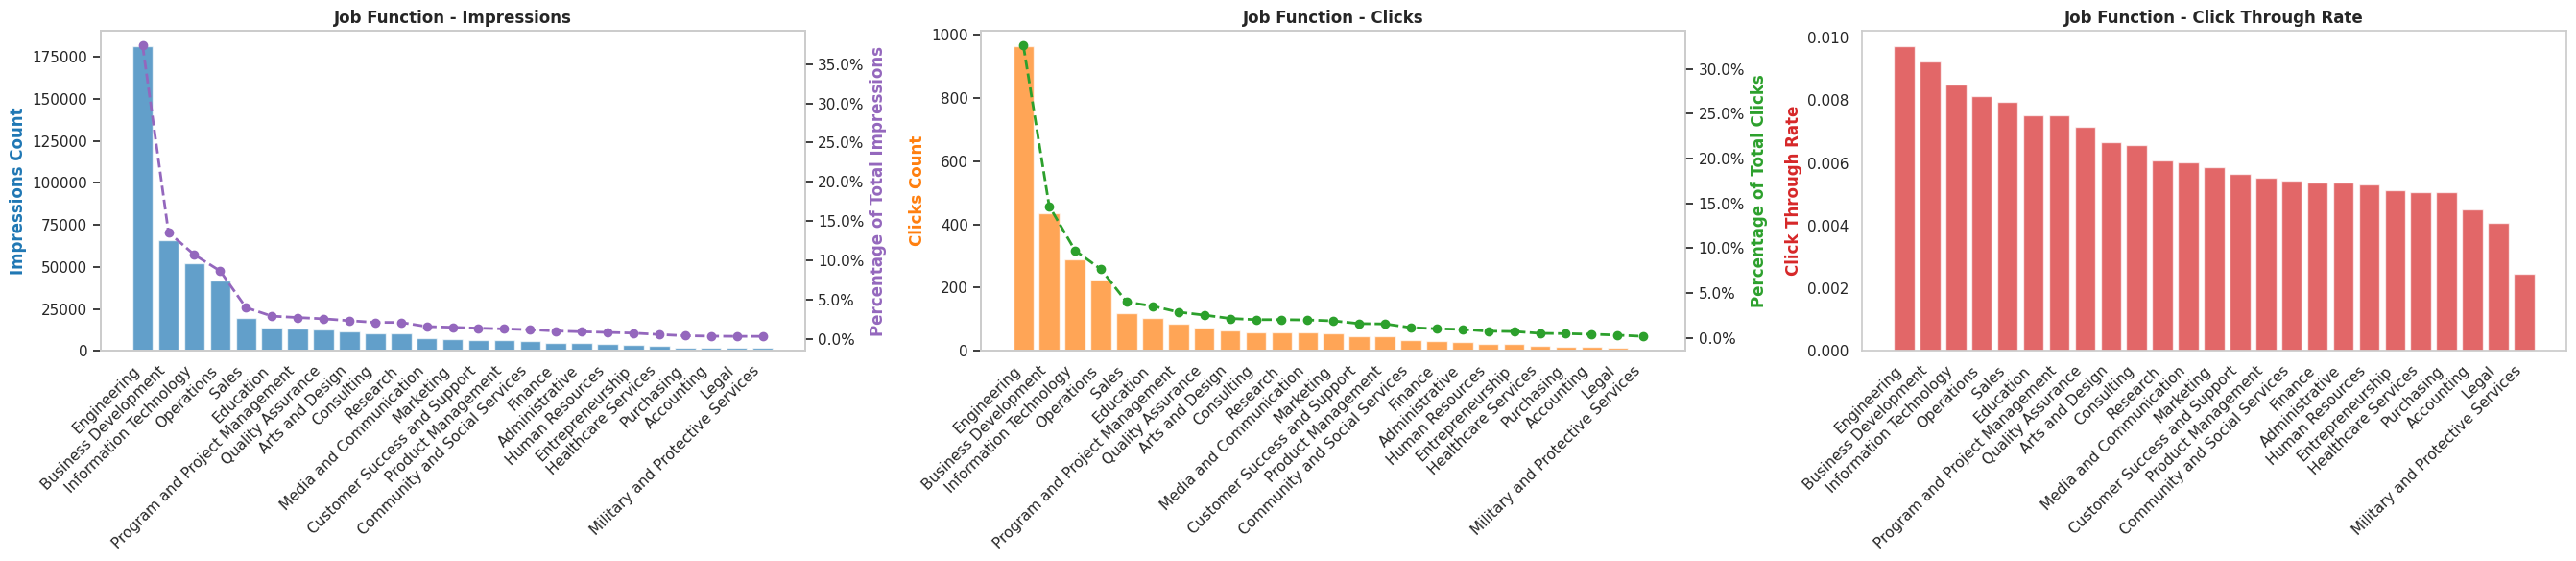

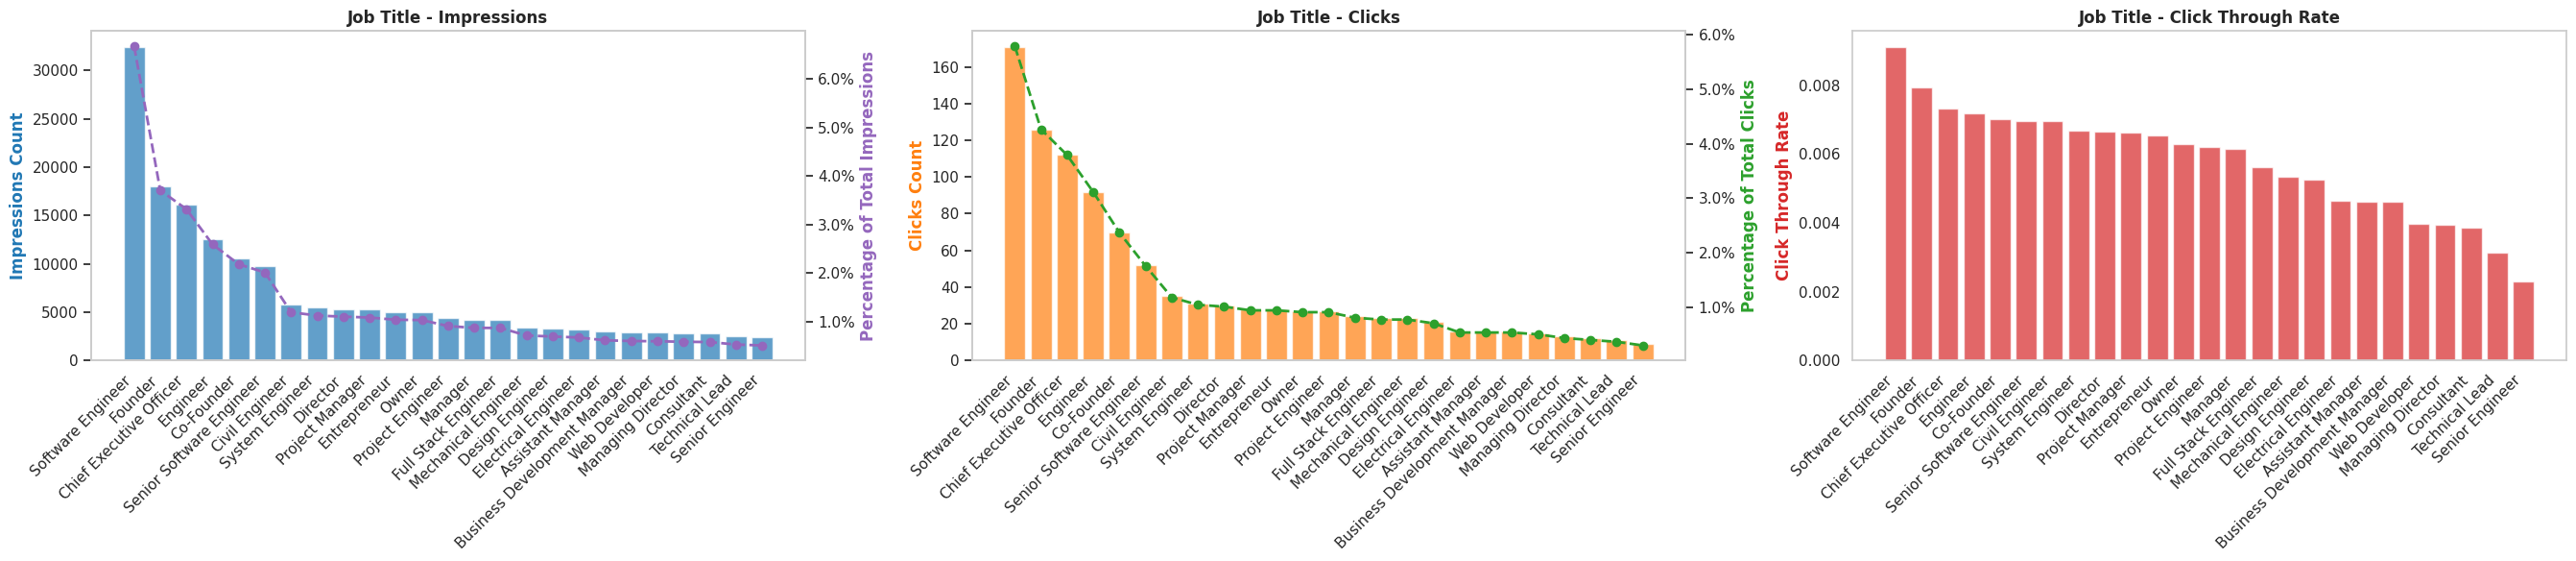

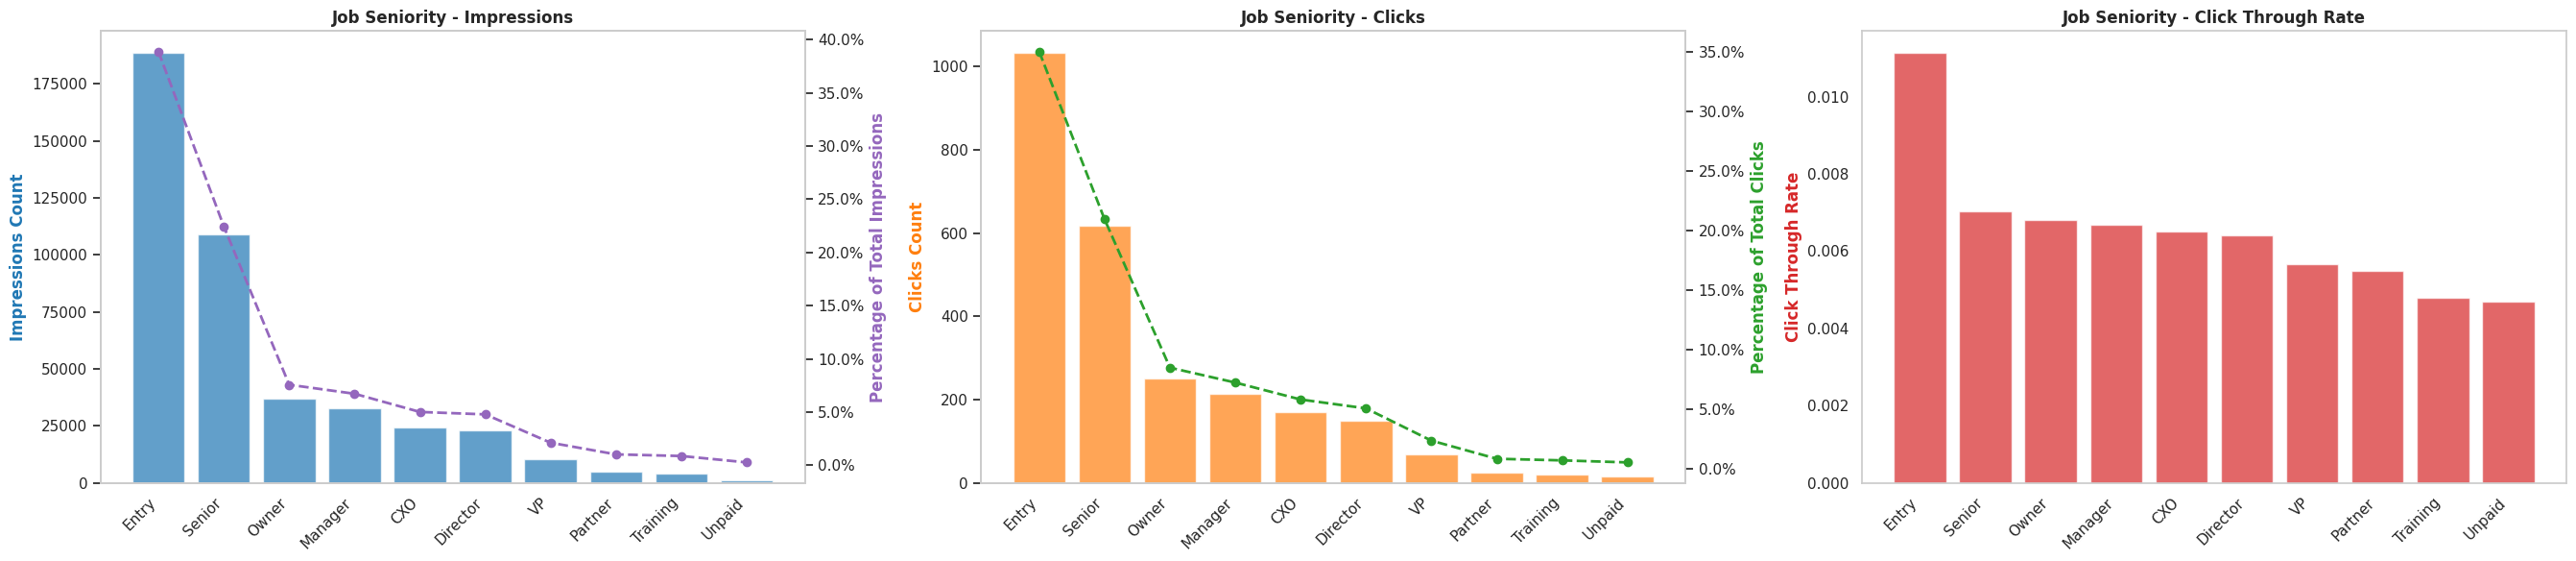

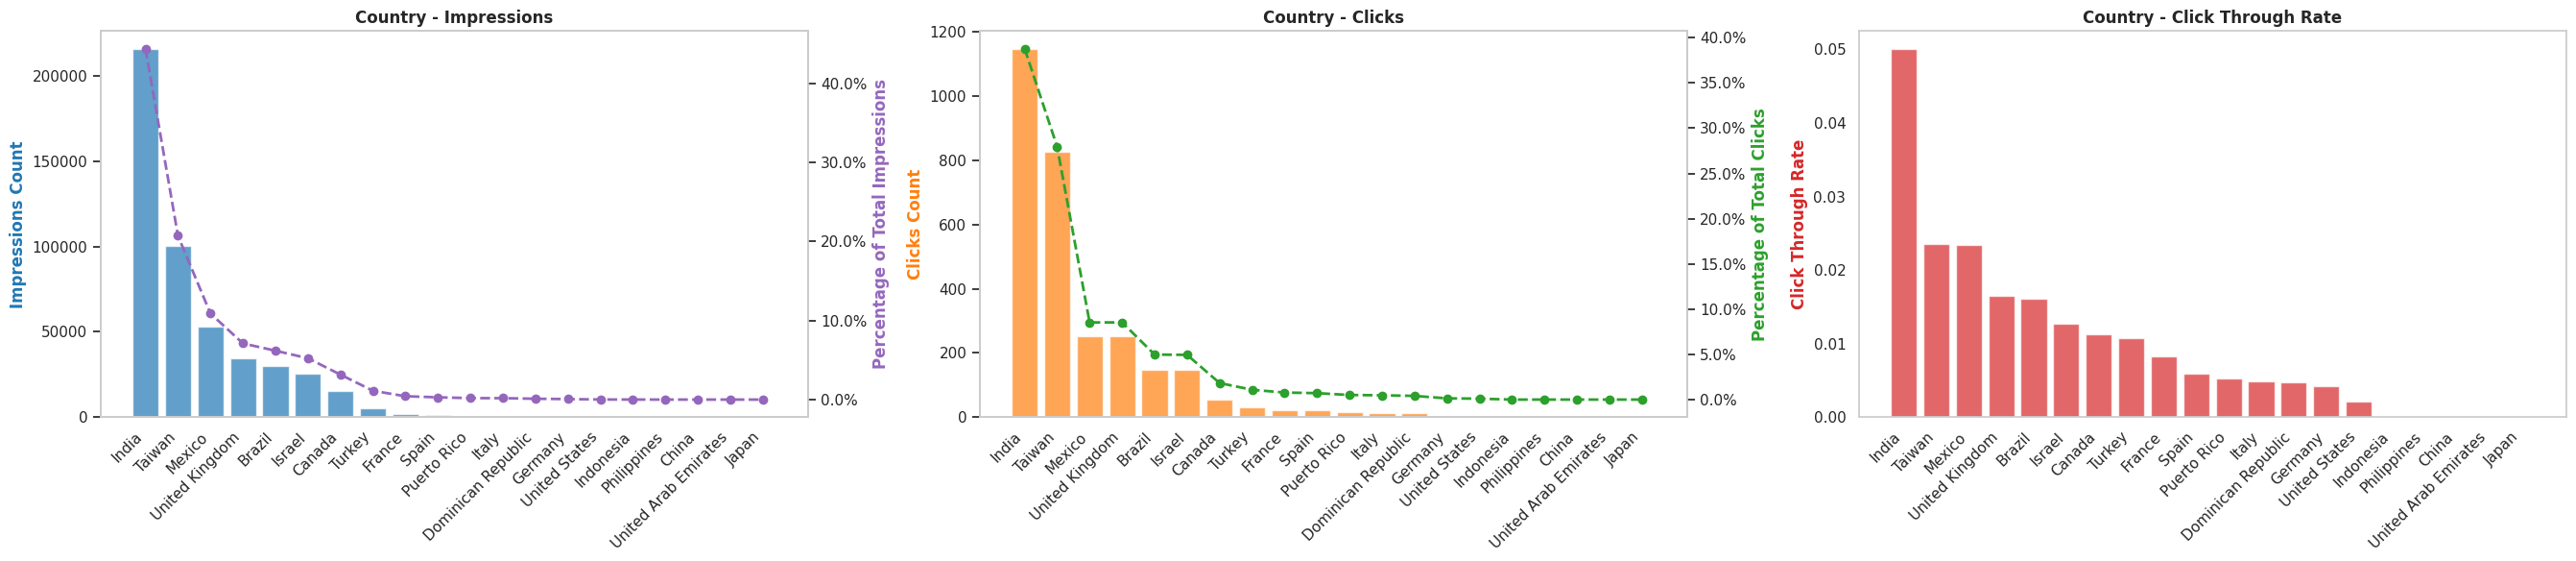

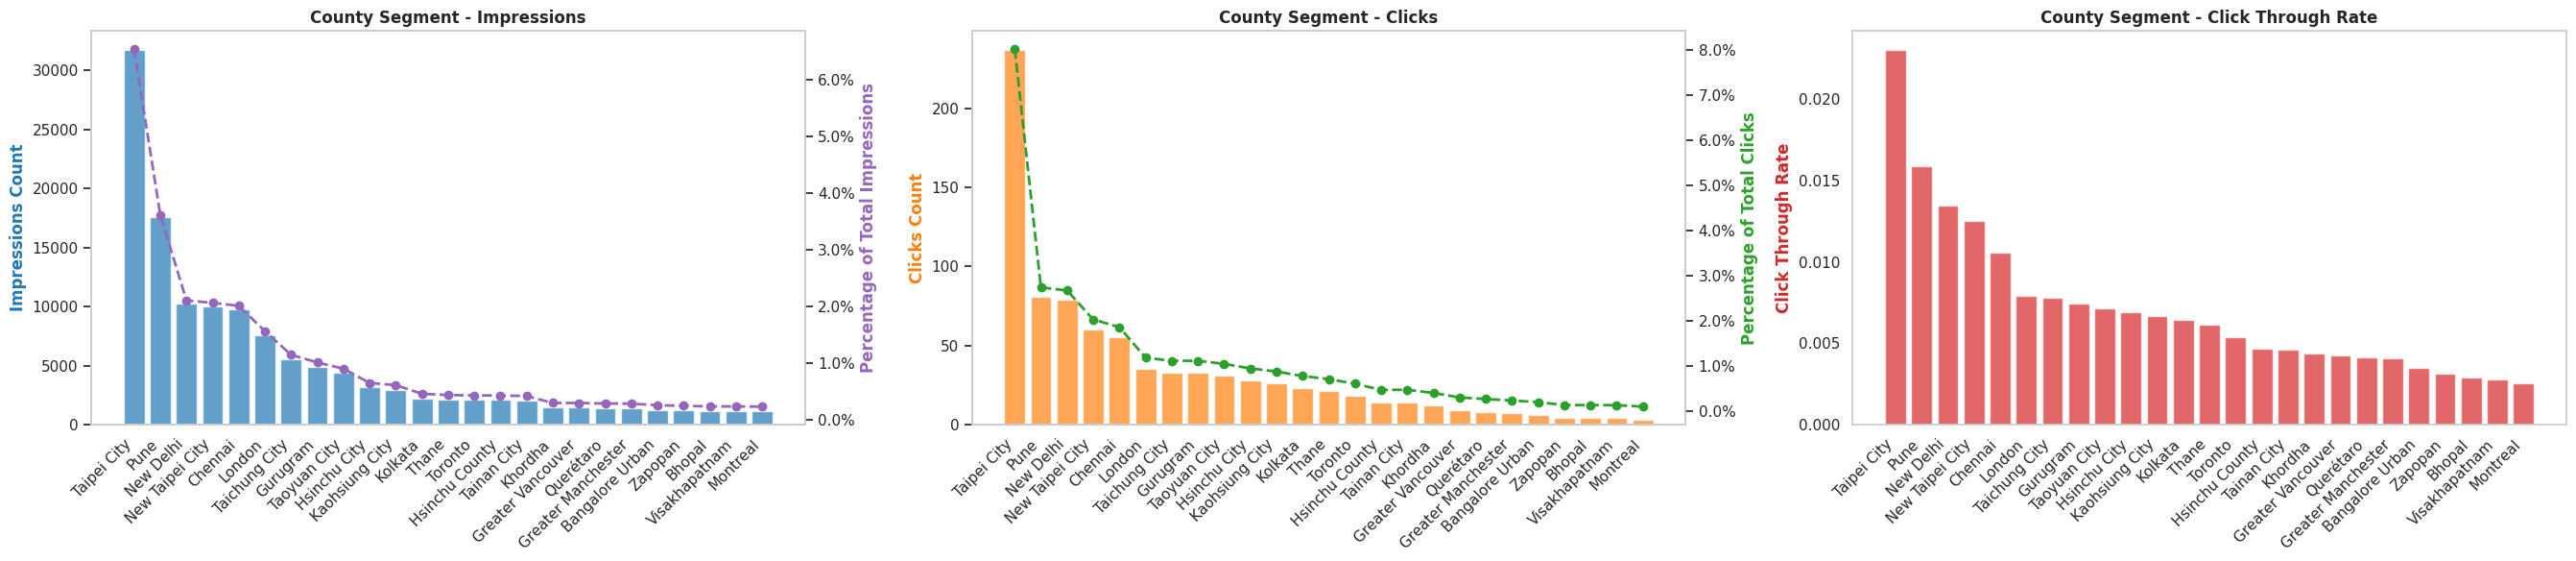

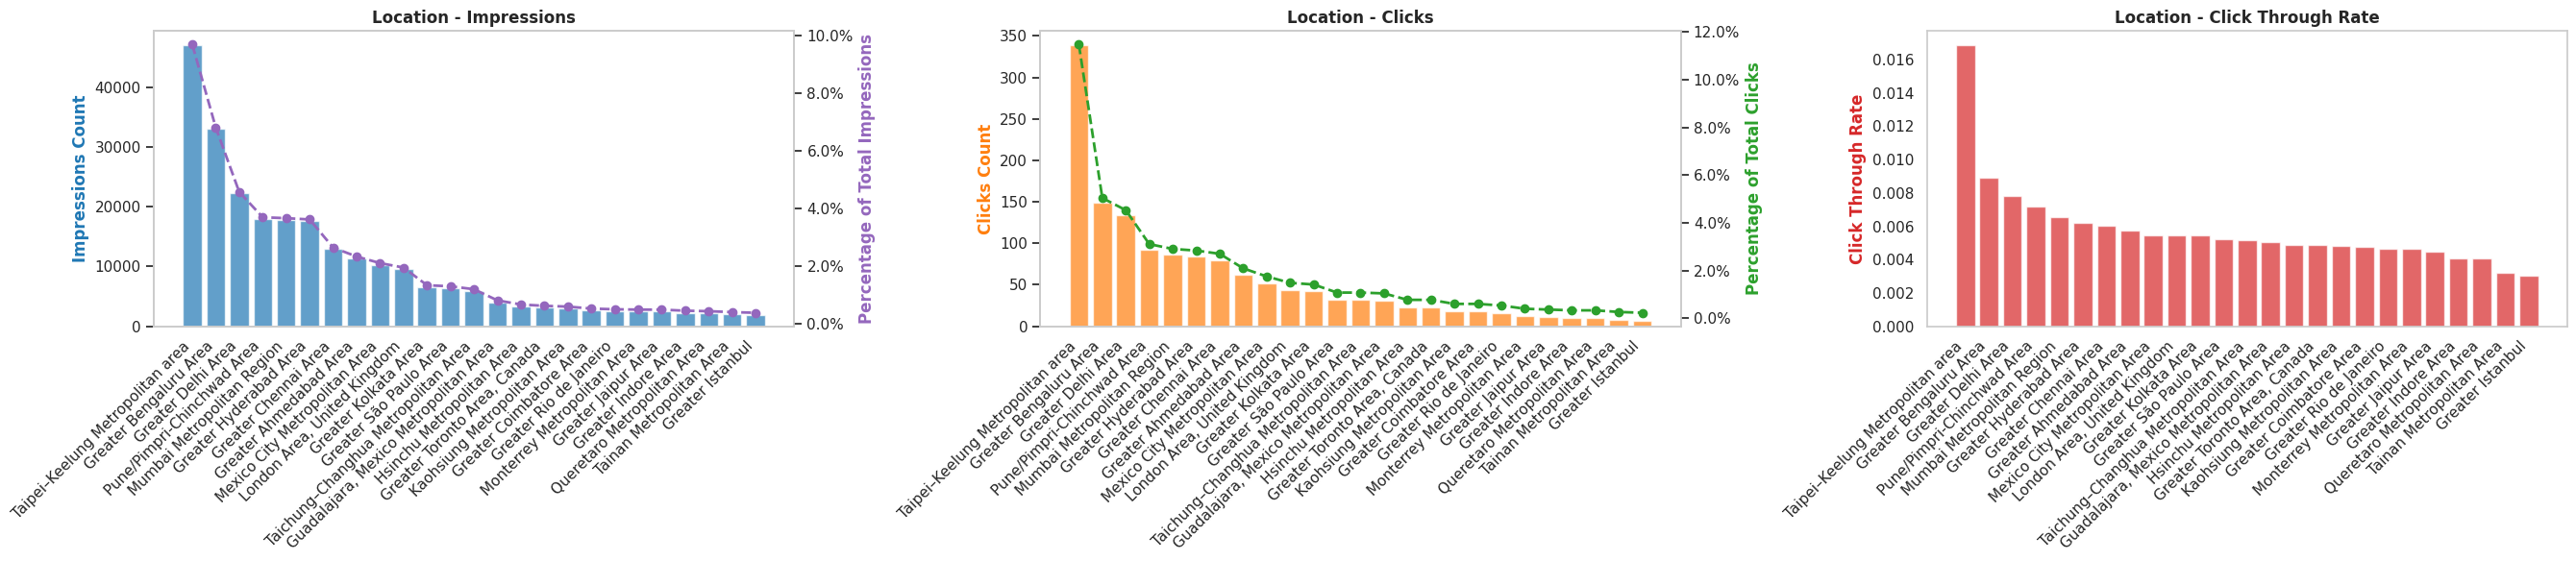

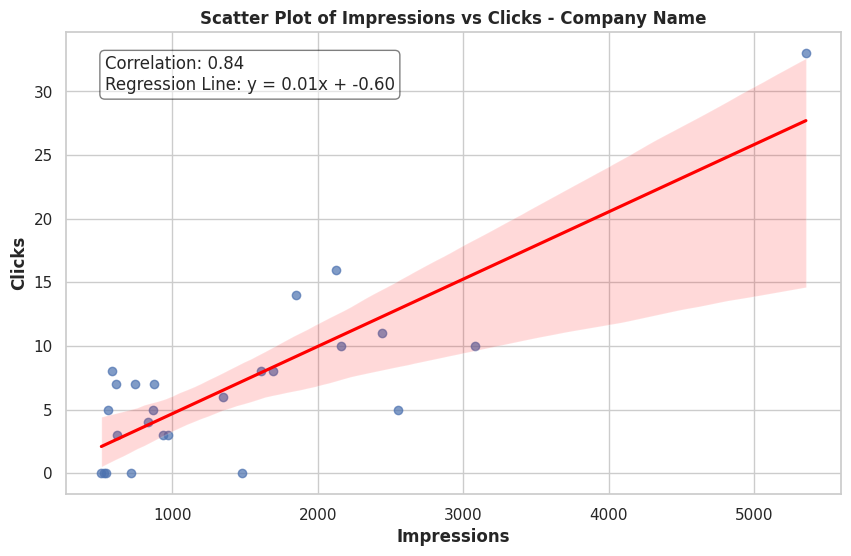

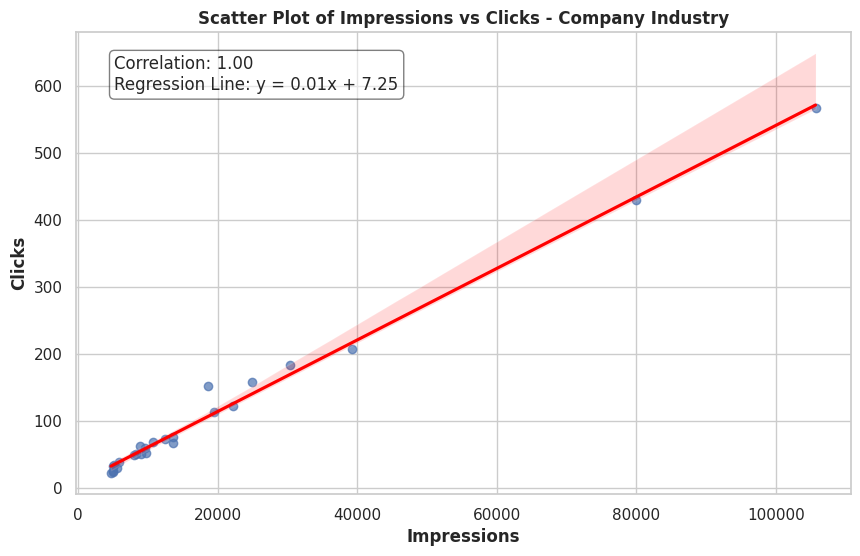

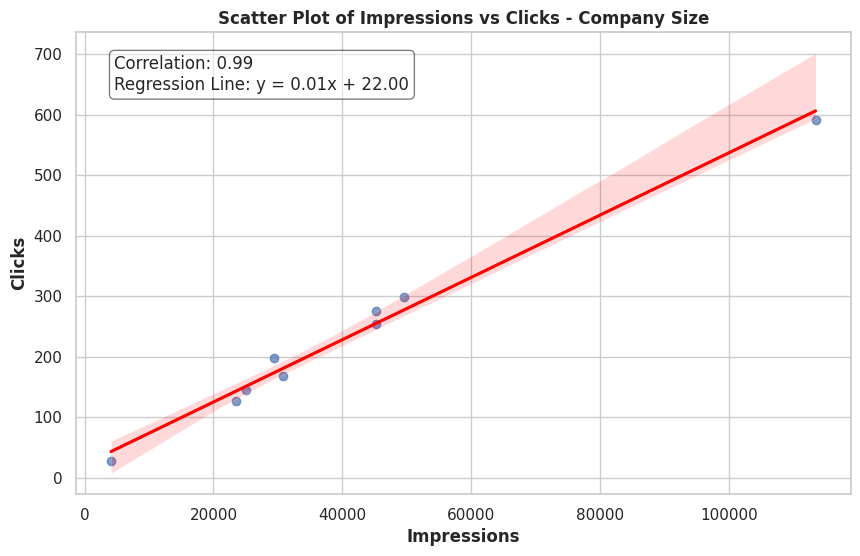

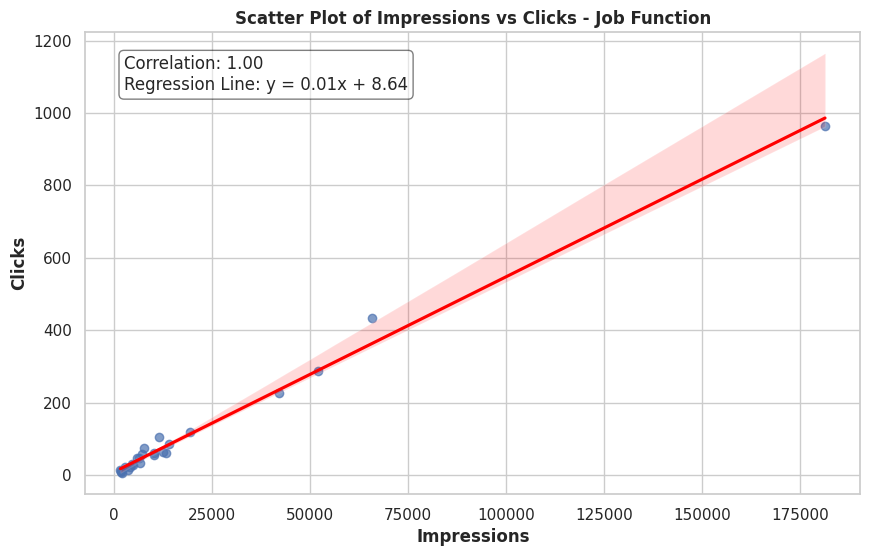

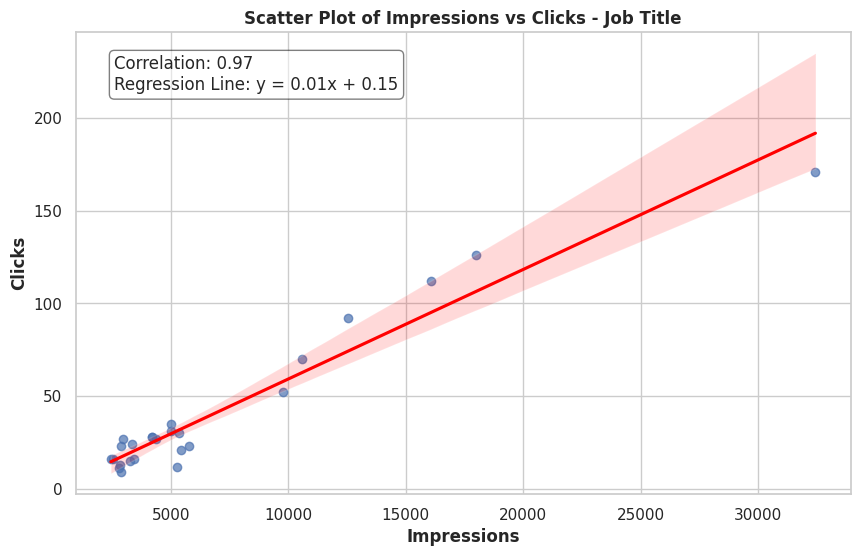

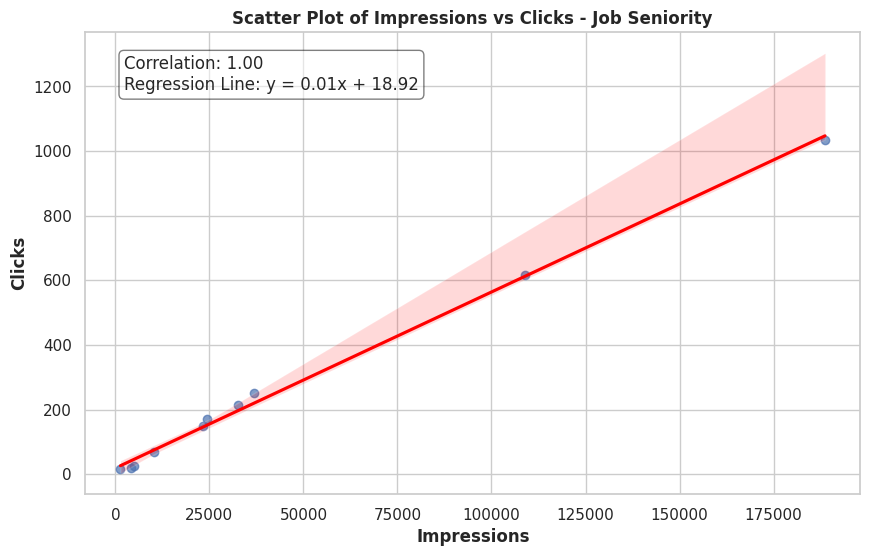

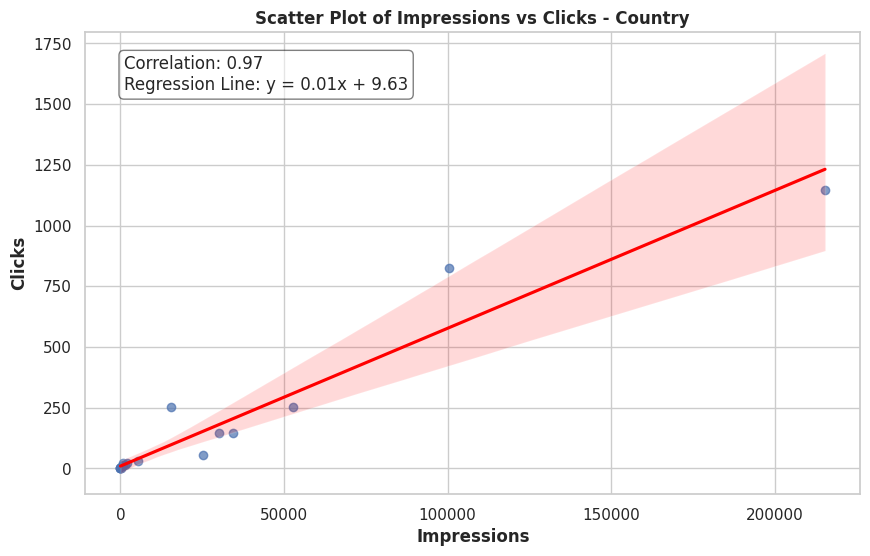

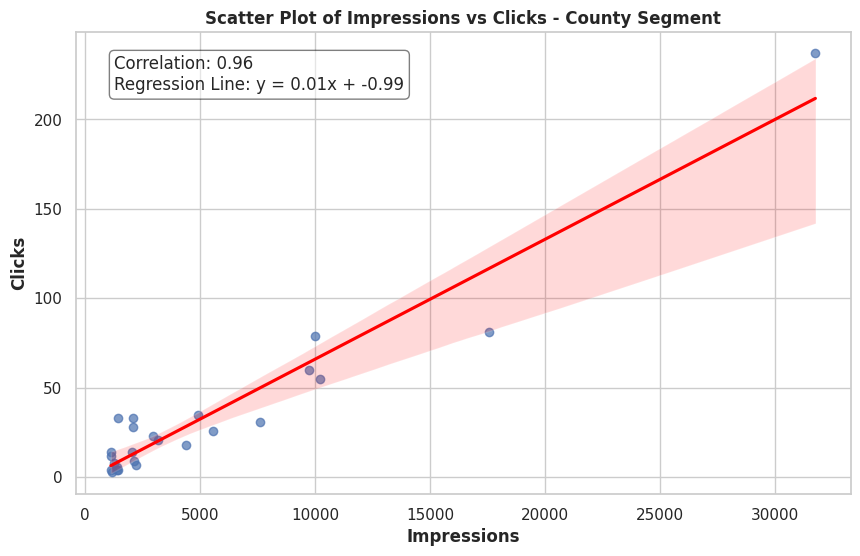

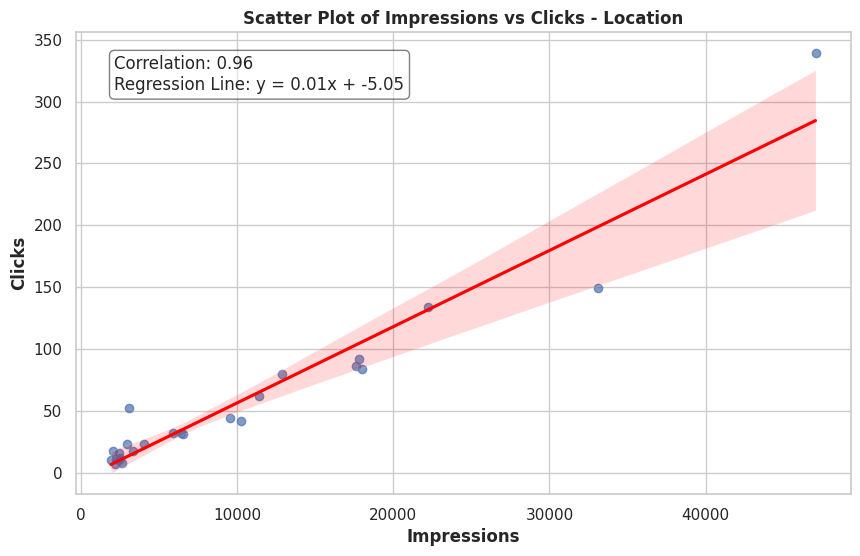



Top 5 Data Points for Company Name:
+----+---------------------------+---------------+----------+----------------------+
|    |   Company Name Segment    |  Impressions  |  Clicks  |  Click Through Rate  |
+====+===========================+===============+==========+======================+
| 0  | Tata Consultancy Services |     5357      |    33    |        0.62%         |
+----+---------------------------+---------------+----------+----------------------+
| 1  |          Infosys          |     3080      |    10    |        0.33%         |
+----+---------------------------+---------------+----------+----------------------+
| 2  |         Cognizant         |     2552      |    5     |        0.20%         |
+----+---------------------------+---------------+----------+----------------------+
| 3  |         Accenture         |     2438      |    11    |        0.45%         |
+----+---------------------------+---------------+----------+----------------------+
| 4  |           TSMC      

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
from scipy.stats import linregress
from tabulate import tabulate

# Load the Excel file
file_path = '/content/LinkedIn Canada Catalyst Demographic.xlsx'
xls = pd.ExcelFile(file_path)

# Define the sheets we want to analyze
sheet_names = xls.sheet_names

# Initialize seaborn for plotting
sns.set(style="whitegrid")

# Define colors for better visual distinction
impressions_colors = ['#1f77b4', '#9467bd']  # Colors for Impressions and % of Total Impressions
clicks_colors = ['#ff7f0e', '#2ca02c']  # Colors for Clicks and % of Total Clicks
ctr_colors = ['#d62728', '#e377c2']  # Colors for CTR and % of Total CTR

# Section 1: Bar and Line Plots for Impressions, Clicks, and Click Through Rate (CTR)
for sheet in sheet_names:
    df = xls.parse(sheet_name=sheet)
    sorted_df_impressions = df.sort_values(by='Impressions', ascending=False)
    sorted_df_clicks = df.sort_values(by='Clicks', ascending=False)
    sorted_df_ctr = df.sort_values(by='Click Through Rate', ascending=False)

    # Create figure with three subplots for Impressions, Clicks, and Click Through Rate
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27, 6), dpi=100)

    # Impressions subplot
    ax1 = axes[0]
    ax1.bar(sorted_df_impressions.iloc[:, 0], sorted_df_impressions['Impressions'], color=impressions_colors[0], alpha=0.7)
    ax1.grid(False)  # Remove gridlines for primary axis
    ax1_twin = ax1.twinx()
    ax1_twin.plot(sorted_df_impressions.iloc[:, 0], sorted_df_impressions['Percent of Total Impressions'], color=impressions_colors[1], linestyle='--', linewidth=2, marker='o')
    ax1_twin.grid(False)  # Remove gridlines for twin axis
    ax1.set_title(f'{sheet} - Impressions', fontweight='bold')
    ax1.set_ylabel('Impressions Count', fontweight='bold')
    ax1.yaxis.label.set_color(impressions_colors[0])
    ax1_twin.set_ylabel('Percentage of Total Impressions', fontweight='bold')
    ax1_twin.yaxis.label.set_color(impressions_colors[1])
    ax1_twin.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

    # Clicks subplot
    ax2 = axes[1]
    ax2.bar(sorted_df_clicks.iloc[:, 0], sorted_df_clicks['Clicks'], color=clicks_colors[0], alpha=0.7)
    ax2.grid(False)  # Remove gridlines for primary axis
    ax2_twin = ax2.twinx()
    ax2_twin.plot(sorted_df_clicks.iloc[:, 0], sorted_df_clicks['Percent of Total Clicks'], color=clicks_colors[1], linestyle='--', linewidth=2, marker='o')
    ax2_twin.grid(False)  # Remove gridlines for twin axis
    ax2.set_title(f'{sheet} - Clicks', fontweight='bold')
    ax2.set_ylabel('Clicks Count', fontweight='bold')
    ax2.yaxis.label.set_color(clicks_colors[0])
    ax2_twin.set_ylabel('Percentage of Total Clicks', fontweight='bold')
    ax2_twin.yaxis.label.set_color(clicks_colors[1])
    ax2_twin.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

    # Click Through Rate (CTR) subplot
    ax3 = axes[2]
    ax3.bar(sorted_df_ctr.iloc[:, 0], sorted_df_ctr['Click Through Rate'], color=ctr_colors[0], alpha=0.7)
    ax3.grid(False)  # Remove gridlines for primary axis
    ax3.set_title(f'{sheet} - Click Through Rate', fontweight='bold')
    ax3.set_ylabel('Click Through Rate', fontweight='bold')
    ax3.yaxis.label.set_color(ctr_colors[0])

    # Set x-axis labels to prevent overlapping for all subplots
    for ax in [ax1, ax2, ax3]:
        ax.set_xticks(range(len(sorted_df_impressions)))
        ax.set_xticklabels(sorted_df_impressions.iloc[:, 0], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

print('\n')  # Add extra space between Sections


# Section 2: Scatter Plots with Regression Lines using Seaborn
for sheet in sheet_names:
    df = xls.parse(sheet_name=sheet)

    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df['Impressions'], df['Clicks'])

    # Initialize the matplotlib figure
    plt.figure(figsize=(10, 6))

    # Use Seaborn's regplot for plotting
    sns.regplot(x='Impressions', y='Clicks', data=df, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

    # Annotate with the correlation coefficient and regression formula with a bounding box
    plt.annotate(f'Correlation: {r_value:.2f}\nRegression Line: y = {slope:.2f}x + {intercept:.2f}',
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=12, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='white', alpha=0.5, edgecolor='black'))

    # Set plot labels and title with bold font
    plt.xlabel('Impressions', fontweight='bold')
    plt.ylabel('Clicks', fontweight='bold')
    plt.title(f'Scatter Plot of Impressions vs Clicks - {sheet}', fontweight='bold')

    # Display the plot
    plt.show()

print('\n')  # Add extra space between Sections


# Section 3: Summary Tables of Top 5 Data Points
top_5_data_points = {}  # Initialize the dictionary for storing top 5 data points
for sheet in sheet_names:
    df = xls.parse(sheet_name=sheet)

    # Sort the dataframe to get the top 5 data points by Impressions, Clicks, and Click Through Rate
    df_sorted = df.sort_values(by=['Impressions', 'Clicks', 'Click Through Rate'], ascending=[False, False, False])

    # Get the top 5 data points
    top_5 = df_sorted.head(5).reset_index(drop=True)

    # CTR is in the 6th column (index 5), convert it to percentages and format it
    top_5.iloc[:, 5] = (top_5.iloc[:, 5] * 100).map("{:.2f}%".format)

    # Select the relevant columns
    top_5 = top_5.iloc[:, [0, 1, 3, 5]]

    # Store the top 5 data points in the dictionary
    top_5_data_points[sheet] = top_5

# Display the top 5 data points for each category in a tabular format using tabulate
for category, top_5_df in top_5_data_points.items():
    print(f"Top 5 Data Points for {category}:")
    print(tabulate(top_5_df, headers='keys', tablefmt='grid', numalign="center", stralign="center"))
    print('\n')  # Add extra space between tables
